<a name="top"></a><img src="source/SpinalHDL.png" alt="SpinalHDL based on Scala" style="width:320px;" />

Before running Spinal HDL code, be sure to load SpinalHDL Libraries  
**Note** : This may be a little slow when the first time load, please wait a moment to download Lib from remote.)   

In [2]:
val path = System.getProperty("user.dir") + "/source/load-spinal.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

path: String = "/Users/jijing/nutstore/gitlab/scala/Spinal-bootcamp/source/load-spinal.sc"

**Note2**: Sometimes we use *"Spinal"* as *"SpinalHDL"* for short, all *"spinal"*,*"Spinal"* appeared means SpinalHDL

## What is this 
This is SpinalHDL Tutorial, More important, it's a spinalHDL run-time environment.

Most of case come from [SpinalDoc](https://spinalhdl.github.io/SpinalDoc-RTD/index.html),
In addition, we also introduced some advanced uses of Scala, which are very helpful to use SpinalHDL and understand how spinalHDL works.

**Why we do such a thing:**
- Sometimes you just want to try a usage of a Spinal or Scala, but you don't want to create a new project.
- Practice is Important for learning a new skill. So we did a lot of examples for you to try run.
 
**Before the start**  

  We assume you already have the basics knowledge of Scala，So there is no introduction to scala syntax here.  
If you need to learn Scala, I would strongly recommend the book of "Programming in Scala"by Martin Odersky who is also the author of Scala 

## Two useful  function

If you want show the generated RTL code in Jupyter-Notebook, use this：

- **`showRtl(new MyTop)`** show RTL code, default Verilog，
- **`showRtl(new MyTop,VHDL)`** show VHDL code，more simple way **`showVhdl(new myTop)`**

SpinalHDL defualt RTL generate methods:

- **`SpinalVerilog(new MyTop)`** generate Verilog under current dir
- **`SpinalVhdl(new MyTop)`** generate VHDL under current dir

Specific dir:  
**`SpinalConfig(mode = Verilog, targetDirectory="rtl/").generate(new MyTop)`**

## First Simple Adder Module
 
A simple adder with parameterized width, the result width auto propogated by Spinal.

Click Run to see what happen!

In [3]:
class Adder(width: Int) extends Component{
  val a = in(UInt(width bits))
  val b = in(UInt(width bits))
  val c = out(UInt()) 
  c := a + b
}
showRtl(new Adder(8))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 3641.0MiB
[Runtime] Current date : 2022.03.05 23:04:24
[Progress] at 0.000 : Elaborate components
[Progress] at 0.106 : Checks and transforms
[Progress] at 0.138 : Generate Verilog
[Done] at 0.212
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Adder
// Git hash  : 8a536d7b1933b1a3ccf364b999143621698e45a2
// Date      : 05/03/2022, 23:04:24

`timescale 1ns/1ps 

module Adder (
  input      [7:0]    a,
  input      [7:0]    b,
  output     [7:0]    c
);


  assign c = (a + b);

endmodule



defined class Adder

The keyword of `Component` comes from VHDL. But for Verilog users, `Moudle` may be more familiar.    
If you like, just use **`type Module = Component`**, it's totally okay.

In [4]:
type Module = Component 

class Adder(width: Int) extends Module{
  val a = in(UInt(width bits))
  val b = in(UInt(width bits))
  val c = out(UInt()) 
  c := a + b
}
showRtl(new Adder(8))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 3641.0MiB
[Runtime] Current date : 2022.03.05 23:04:25
[Progress] at 0.486 : Elaborate components
[Progress] at 0.491 : Checks and transforms
[Progress] at 0.493 : Generate Verilog
[Done] at 0.510
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Adder
// Git hash  : 8a536d7b1933b1a3ccf364b999143621698e45a2
// Date      : 05/03/2022, 23:04:25

`timescale 1ns/1ps 

module Adder (
  input      [7:0]    a,
  input      [7:0]    b,
  output     [7:0]    c
);


  assign c = (a + b);

endmodule



defined type Module
defined class Adder

## How to generate a Soc Top
 
It's a very simple thing in spinal. It may take 2 second, use one line of Spinal code   `SpinalVerilog(new Pinsec(500 MHz))`

In [5]:
import spinal.lib.soc.pinsec._
SpinalVerilog(new Pinsec(500 MHz))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 3641.0MiB
[Runtime] Current date : 2022.03.05 23:04:25
[Progress] at 0.695 : Elaborate components
[Progress] at 1.181 : Checks and transforms
[Progress] at 1.446 : Generate Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] 440 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 1.747


import spinal.lib.soc.pinsec._

res4_1: SpinalReport[Pinsec] = spinal.core.SpinalReport@3ba3c898

This will generate a complete SOC of **Pinsec.v** under current dir, you can also use `showRtl(new Pinsec(500 MHz)` show them on the current page.

Which contains a riscv processor, a set of Axi cross bars, and MEM, JTAG, APB bridge, timer, GPIO and other peripherals.
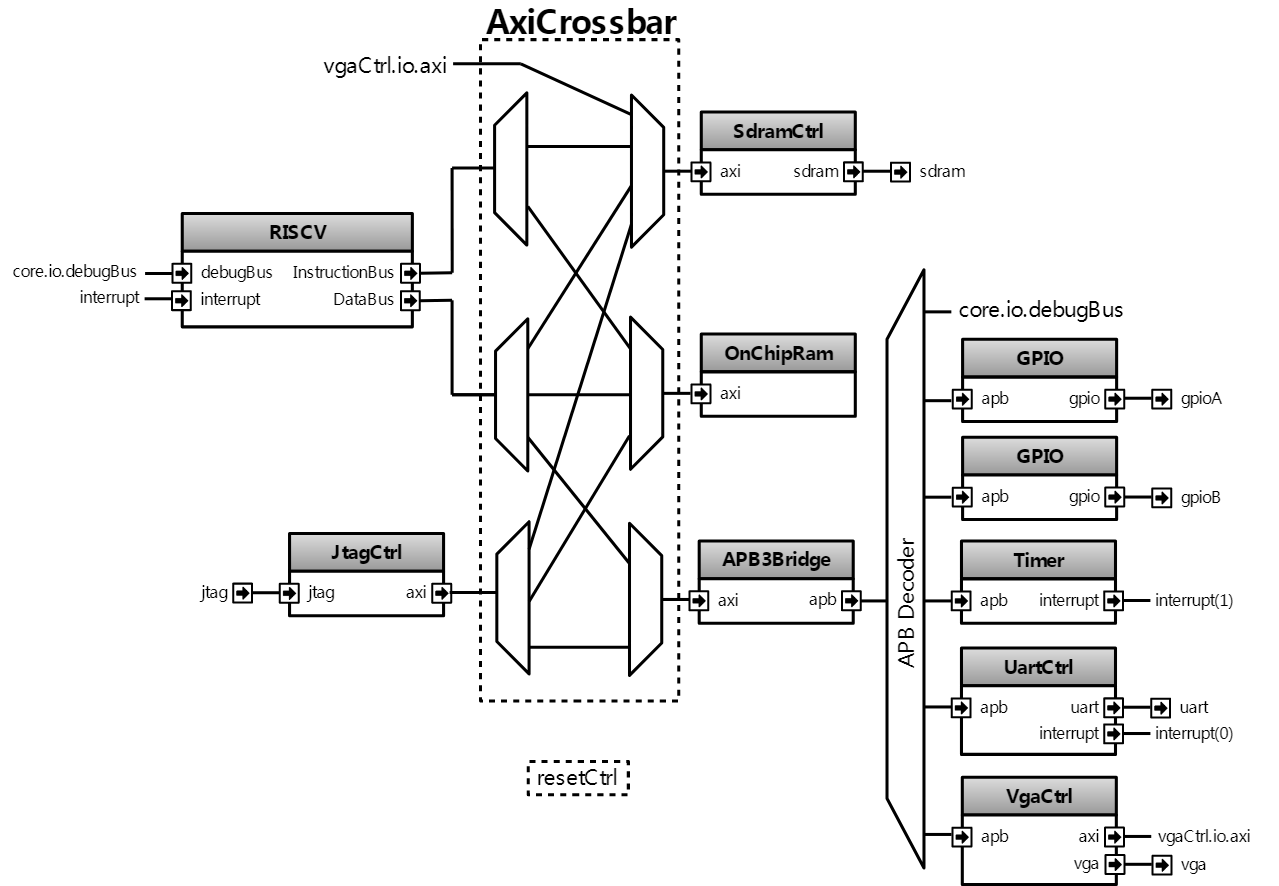

You may have some questions. What does it generate in such a simple way?  
Can I customize the parameter specifications by myself? There is no problem at all.

Please execute the following code snippets in order to customize the SOC

### First Config Cpu


In [6]:
import spinal.lib.bus.amba3.apb._
import spinal.lib.bus.amba4.axi._
import spinal.lib.com.jtag.Jtag
import spinal.lib.com.uart.{Uart, UartCtrlGenerics, UartCtrlMemoryMappedConfig, Apb3UartCtrl}
import spinal.lib.cpu.riscv.impl.Utils.BR
import spinal.lib.cpu.riscv.impl.build.RiscvAxi4
import spinal.lib.cpu.riscv.impl.extension.{BarrelShifterFullExtension, DivExtension, MulExtension}
import spinal.lib.cpu.riscv.impl._
import spinal.lib.graphic.RgbConfig
import spinal.lib.graphic.vga.{Vga, Axi4VgaCtrlGenerics, Axi4VgaCtrl}
import spinal.lib.io.TriStateArray
import spinal.lib.memory.sdram._
import spinal.lib.system.debugger.{JtagAxi4SharedDebugger, SystemDebuggerConfig}

val myCpuConfig = RiscvCoreConfig(
        pcWidth = 32,
        addrWidth = 32,
        startAddress = 0x00000000,
        regFileReadyKind = sync,
        branchPrediction = dynamic,
        bypassExecute0 = true,
        bypassExecute1 = true,
        bypassWriteBack = true,
        bypassWriteBackBuffer = true,
        collapseBubble = false,
        fastFetchCmdPcCalculation = true,
        dynamicBranchPredictorCacheSizeLog2 = 7
      )

myCpuConfig.add(new MulExtension)
myCpuConfig.add(new DivExtension)
myCpuConfig.add(new BarrelShifterFullExtension)

import spinal.lib.bus.amba3.apb._

import spinal.lib.bus.amba4.axi._

import spinal.lib.com.jtag.Jtag

import spinal.lib.com.uart.{Uart, UartCtrlGenerics, UartCtrlMemoryMappedConfig, Apb3UartCtrl}

import spinal.lib.cpu.riscv.impl.Utils.BR

import spinal.lib.cpu.riscv.impl.build.RiscvAxi4

import spinal.lib.cpu.riscv.impl.extension.{BarrelShifterFullExtension, DivExtension, MulExtension}

import spinal.lib.cpu.riscv.impl._

import spinal.lib.graphic.RgbConfig

import spinal.lib.graphic.vga.{Vga, Axi4VgaCtrlGenerics, Axi4VgaCtrl}

import spinal.lib.io.TriStateArray

import spinal.lib.memory.sdram._

import spinal.lib.system.debugger.{JtagAxi4SharedDebugger, SystemDebuggerConfig}


myCpuConfig: RiscvCoreConfig = RiscvCoreConfig(
  32,
  32,
  0,
  true,
  true,
  true,
  true,
  false,
  spinal.lib.cpu.riscv.impl.dynamic$@4d0abae6,
  spinal.lib.cpu.riscv.impl.sync$@64be7c47,
  true,
  7,
  2,
  0,
  1
)
res5_14: MulExtension = spinal.lib.cpu.riscv.impl.extension.MulExtension@22796dba
res

### Extension your CPU
```scala
myCpuConfig.add(new MulExtension)
myCpuConfig.add(new DivExtension)
myCpuConfig.add(new BarrelShifterFullExtension)
```

If you've developed floating-core or vector processing extensions with Spinal, you can also extension it this way

```scala
myCpuConfig.add(new myFloatExtension)
myCpuConfig.add(new myVectorExtension) 
```

### Config your iCache

In [7]:
val myiCacheConfig = InstructionCacheConfig(
        cacheSize    = 4096,
        bytePerLine  = 32,
        wayCount     = 1,  //Can only be one for the moment
        wrappedMemAccess = true,
        addressWidth = 32,
        cpuDataWidth = 32,
        memDataWidth = 32
      )

myiCacheConfig: InstructionCacheConfig = InstructionCacheConfig(
  4096,
  32,
  1,
  true,
  32,
  32,
  32
)

###  ReConfig your Soc

Put the new riscvCpu，iCache config into Soc config，We can get a completely new **Configed Soc System**

In [8]:
import spinal.lib.memory.sdram.sdr.IS42x320D
val mySocConfig = PinsecConfig(
    axiFrequency   = 100 MHz,
    onChipRamSize  = 4 KiB,
    sdramLayout    = IS42x320D.layout,
    sdramTimings   = IS42x320D.timingGrade7,
    cpu            = myCpuConfig,
    iCache         = myiCacheConfig)

showRtl(new Pinsec(mySocConfig))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 3641.0MiB
[Runtime] Current date : 2022.03.05 23:04:26
[Progress] at 2.267 : Elaborate components
[Progress] at 2.306 : Checks and transforms
[Progress] at 2.409 : Generate Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Done] at 2.547
// Generator : SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
// Component : Pinsec
// Git hash  : 8a536d7b1933b1a3ccf364b999143621698e45a2
// Date      : 05/03/2022, 23:04:26

`timescale 1ns/1ps 

module Pinsec (
  input               io_asyncReset,
  input               io_axiClk,
  input               io_vgaClk,
  input               io_jtag_tms,
  input               io_jtag_tdi,
  output              io_jtag_tdo,
  i

  wire                axi_core_io_i_decoder_io_input_r_valid;
  wire       [31:0]   axi_core_io_i_decoder_io_input_r_payload_data;
  wire                axi_core_io_i_decoder_io_input_r_payload_last;
  wire                axi_core_io_i_decoder_io_outputs_0_ar_valid;
  wire       [31:0]   axi_core_io_i_decoder_io_outputs_0_ar_payload_addr;
  wire       [7:0]    axi_core_io_i_decoder_io_outputs_0_ar_payload_len;
  wire       [1:0]    axi_core_io_i_decoder_io_outputs_0_ar_payload_burst;
  wire                axi_core_io_i_decoder_io_outputs_0_r_ready;
  wire                axi_core_io_i_decoder_io_outputs_1_ar_valid;
  wire       [31:0]   axi_core_io_i_decoder_io_outputs_1_ar_payload_addr;
  wire       [7:0]    axi_core_io_i_decoder_io_outputs_1_ar_payload_len;
  wire       [1:0]    axi_core_io_i_decoder_io_outputs_1_ar_payload_burst;
  wire                axi_core_io_i_decoder_io_outputs_1_r_ready;
  wire                axi_core_io_d_decoder_io_input_arw_ready;
  wire                axi_

  wire       [3:0]    axi_ram_io_axi_arbiter_io_output_arw_payload_id;
  wire       [7:0]    axi_ram_io_axi_arbiter_io_output_arw_payload_len;
  wire       [2:0]    axi_ram_io_axi_arbiter_io_output_arw_payload_size;
  wire       [1:0]    axi_ram_io_axi_arbiter_io_output_arw_payload_burst;
  wire                axi_ram_io_axi_arbiter_io_output_arw_payload_write;
  wire                axi_ram_io_axi_arbiter_io_output_w_valid;
  wire       [31:0]   axi_ram_io_axi_arbiter_io_output_w_payload_data;
  wire       [3:0]    axi_ram_io_axi_arbiter_io_output_w_payload_strb;
  wire                axi_ram_io_axi_arbiter_io_output_w_payload_last;
  wire                axi_ram_io_axi_arbiter_io_output_b_ready;
  wire                axi_ram_io_axi_arbiter_io_output_r_ready;
  wire                axi_sdramCtrl_io_axi_arbiter_io_readInputs_0_ar_ready;
  wire                axi_sdramCtrl_io_axi_arbiter_io_readInputs_0_r_valid;
  wire       [31:0]   axi_sdramCtrl_io_axi_arbiter_io_readInputs_0_r_payload_d

  wire                axi_core_io_i_decoder_io_outputs_1_ar_validPipe_valid;
  wire                axi_core_io_i_decoder_io_outputs_1_ar_validPipe_ready;
  wire       [31:0]   axi_core_io_i_decoder_io_outputs_1_ar_validPipe_payload_addr;
  wire       [7:0]    axi_core_io_i_decoder_io_outputs_1_ar_validPipe_payload_len;
  wire       [1:0]    axi_core_io_i_decoder_io_outputs_1_ar_validPipe_payload_burst;
  reg                 axi_core_io_i_decoder_io_outputs_1_ar_rValid;
  wire                axi_core_io_i_decoder_io_outputs_1_ar_validPipe_fire;
  wire                axi_core_io_i_decoder_io_outputs_1_ar_validPipe_fire_1;
  wire                axi_core_io_d_decoder_io_sharedOutputs_0_arw_validPipe_valid;
  wire                axi_core_io_d_decoder_io_sharedOutputs_0_arw_validPipe_ready;
  wire       [31:0]   axi_core_io_d_decoder_io_sharedOutputs_0_arw_validPipe_payload_addr;
  wire       [2:0]    axi_core_io_d_decoder_io_sharedOutputs_0_arw_validPipe_payload_size;
  wire                

  wire       [3:0]    axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_payload_strb;
  reg                 axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rValid;
  reg        [31:0]   axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rData_data;
  reg        [3:0]    axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rData_strb;
  wire                when_Stream_l342;
  wire       [2:0]    t_io_sharedInputs_0_arw_payload_id_2;
  wire       [2:0]    t_io_sharedInputs_1_arw_payload_id_2;
  wire                axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_valid;
  wire                axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_ready;
  wire       [19:0]   axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_addr;
  wire       [3:0]    axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_id;
  wire                axi_apbBridge_io_axi_arbiter_io_output_arw_halfPipe_payload_write;
  reg                 axi_apbBridge_io_axi_arbiter_io_output_arw_rValid;
  wi

    .io_axi_arw_payload_id       (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_id[3:0]          ), //i
    .io_axi_arw_payload_len      (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_len[7:0]         ), //i
    .io_axi_arw_payload_size     (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_size[2:0]        ), //i
    .io_axi_arw_payload_burst    (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_burst[1:0]       ), //i
    .io_axi_arw_payload_write    (axi_sdramCtrl_io_axi_arbiter_io_output_arw_halfPipe_payload_write            ), //i
    .io_axi_w_valid              (axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_valid               ), //i
    .io_axi_w_ready              (axi_sdramCtrl_io_axi_w_ready                                                 ), //o
    .io_axi_w_payload_data       (axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_payload_data[31:0]  ), //i
    .io_axi_w_payload_strb       (axi_sdramCtrl_io_axi_a

    .io_axiClk                   (io_axiClk                                                               ), //i
    .resetCtrl_axiReset          (resetCtrl_axiReset                                                      )  //i
  );
  Apb3Gpio axi_gpioACtrl (
    .io_apb_PADDR           (axi_gpioACtrl_io_apb_PADDR[3:0]          ), //i
    .io_apb_PSEL            (apb3Router_1_io_outputs_0_PSEL           ), //i
    .io_apb_PENABLE         (apb3Router_1_io_outputs_0_PENABLE        ), //i
    .io_apb_PREADY          (axi_gpioACtrl_io_apb_PREADY              ), //o
    .io_apb_PWRITE          (apb3Router_1_io_outputs_0_PWRITE         ), //i
    .io_apb_PWDATA          (apb3Router_1_io_outputs_0_PWDATA[31:0]   ), //i
    .io_apb_PRDATA          (axi_gpioACtrl_io_apb_PRDATA[31:0]        ), //o
    .io_gpio_read           (io_gpioA_read[31:0]                      ), //i
    .io_gpio_write          (axi_gpioACtrl_io_gpio_write[31:0]        ), //o
    .io_gpio_writeEnable    (axi_gpioACtrl_io_gpi

    .io_outputs_0_ar_payload_len      (axi_core_io_i_decoder_io_outputs_0_ar_payload_len[7:0]             ), //o
    .io_outputs_0_ar_payload_burst    (axi_core_io_i_decoder_io_outputs_0_ar_payload_burst[1:0]           ), //o
    .io_outputs_0_r_valid             (axi_ram_io_axi_arbiter_io_readInputs_0_r_valid                     ), //i
    .io_outputs_0_r_ready             (axi_core_io_i_decoder_io_outputs_0_r_ready                         ), //o
    .io_outputs_0_r_payload_data      (axi_ram_io_axi_arbiter_io_readInputs_0_r_payload_data[31:0]        ), //i
    .io_outputs_0_r_payload_last      (axi_ram_io_axi_arbiter_io_readInputs_0_r_payload_last              ), //i
    .io_outputs_1_ar_valid            (axi_core_io_i_decoder_io_outputs_1_ar_valid                        ), //o
    .io_outputs_1_ar_ready            (axi_core_io_i_decoder_io_outputs_1_ar_validPipe_fire_1             ), //i
    .io_outputs_1_ar_payload_addr     (axi_core_io_i_decoder_io_outputs_1_ar_payload_addr[31:0] 

    .io_sharedOutputs_2_arw_payload_write    (axi_core_io_d_decoder_io_sharedOutputs_2_arw_payload_write           ), //o
    .io_sharedOutputs_2_w_valid              (axi_core_io_d_decoder_io_sharedOutputs_2_w_valid                     ), //o
    .io_sharedOutputs_2_w_ready              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_w_ready               ), //i
    .io_sharedOutputs_2_w_payload_data       (axi_core_io_d_decoder_io_sharedOutputs_2_w_payload_data[31:0]        ), //o
    .io_sharedOutputs_2_w_payload_last       (axi_core_io_d_decoder_io_sharedOutputs_2_w_payload_last              ), //o
    .io_sharedOutputs_2_b_valid              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_b_valid               ), //i
    .io_sharedOutputs_2_b_ready              (axi_core_io_d_decoder_io_sharedOutputs_2_b_ready                     ), //o
    .io_sharedOutputs_2_r_valid              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_r_valid               ), //i
    .io_sharedOutputs_2_

    .io_sharedOutputs_2_w_ready              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_w_ready                 ), //i
    .io_sharedOutputs_2_w_payload_data       (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_w_payload_data[31:0]    ), //o
    .io_sharedOutputs_2_w_payload_last       (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_w_payload_last          ), //o
    .io_sharedOutputs_2_b_valid              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_b_valid                 ), //i
    .io_sharedOutputs_2_b_ready              (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_b_ready                 ), //o
    .io_sharedOutputs_2_r_valid              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_valid                 ), //i
    .io_sharedOutputs_2_r_ready              (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_r_ready                 ), //o
    .io_sharedOutputs_2_r_payload_data       (axi_apbBridge_io_axi_arbiter_io_sharedInputs_1_r_payload_data[31:0]    ), //i
    .io_

    .io_sharedInputs_1_arw_payload_len      (t_io_sharedInputs_1_arw_payload_len[7:0]                                        ), //i
    .io_sharedInputs_1_arw_payload_size     (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_payload_size[2:0]  ), //i
    .io_sharedInputs_1_arw_payload_burst    (2'b01                                                                           ), //i
    .io_sharedInputs_1_arw_payload_write    (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_payload_write      ), //i
    .io_sharedInputs_1_w_valid              (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_w_valid                          ), //i
    .io_sharedInputs_1_w_ready              (axi_ram_io_axi_arbiter_io_sharedInputs_1_w_ready                                ), //o
    .io_sharedInputs_1_w_payload_data       (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_w_payload_data[31:0]             ), //i
    .io_sharedInputs_1_w_payload_strb       (axi_jtagCtrl_io_axi_decoder_io_

    .io_sharedInputs_0_arw_payload_addr     (axi_sdramCtrl_io_axi_arbiter_io_sharedInputs_0_arw_payload_addr[25:0]           ), //i
    .io_sharedInputs_0_arw_payload_id       (t_io_sharedInputs_0_arw_payload_id_1[1:0]                                       ), //i
    .io_sharedInputs_0_arw_payload_len      (t_io_sharedInputs_0_arw_payload_len_1[7:0]                                      ), //i
    .io_sharedInputs_0_arw_payload_size     (axi_core_io_d_decoder_io_sharedOutputs_1_arw_validPipe_payload_size[2:0]        ), //i
    .io_sharedInputs_0_arw_payload_burst    (2'b01                                                                           ), //i
    .io_sharedInputs_0_arw_payload_write    (axi_core_io_d_decoder_io_sharedOutputs_1_arw_validPipe_payload_write            ), //i
    .io_sharedInputs_0_w_valid              (axi_core_io_d_decoder_io_sharedOutputs_1_w_valid                                ), //i
    .io_sharedInputs_0_w_ready              (axi_sdramCtrl_io_axi_arbiter_io

    .io_sharedInputs_0_arw_payload_addr     (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_arw_payload_addr[19:0]       ), //i
    .io_sharedInputs_0_arw_payload_id       (t_io_sharedInputs_0_arw_payload_id_2[2:0]                                   ), //i
    .io_sharedInputs_0_arw_payload_write    (axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_payload_write        ), //i
    .io_sharedInputs_0_w_valid              (axi_core_io_d_decoder_io_sharedOutputs_2_w_valid                            ), //i
    .io_sharedInputs_0_w_ready              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_w_ready                      ), //o
    .io_sharedInputs_0_w_payload_data       (axi_core_io_d_decoder_io_sharedOutputs_2_w_payload_data[31:0]               ), //i
    .io_sharedInputs_0_w_payload_last       (axi_core_io_d_decoder_io_sharedOutputs_2_w_payload_last                     ), //i
    .io_sharedInputs_0_b_valid              (axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_b_valid     

    .io_outputs_1_PSEL       (apb3Router_1_io_outputs_1_PSEL          ), //o
    .io_outputs_1_PENABLE    (apb3Router_1_io_outputs_1_PENABLE       ), //o
    .io_outputs_1_PREADY     (axi_gpioBCtrl_io_apb_PREADY             ), //i
    .io_outputs_1_PWRITE     (apb3Router_1_io_outputs_1_PWRITE        ), //o
    .io_outputs_1_PWDATA     (apb3Router_1_io_outputs_1_PWDATA[31:0]  ), //o
    .io_outputs_1_PRDATA     (axi_gpioBCtrl_io_apb_PRDATA[31:0]       ), //i
    .io_outputs_2_PADDR      (apb3Router_1_io_outputs_2_PADDR[19:0]   ), //o
    .io_outputs_2_PSEL       (apb3Router_1_io_outputs_2_PSEL          ), //o
    .io_outputs_2_PENABLE    (apb3Router_1_io_outputs_2_PENABLE       ), //o
    .io_outputs_2_PREADY     (axi_uartCtrl_io_apb_PREADY              ), //i
    .io_outputs_2_PWRITE     (apb3Router_1_io_outputs_2_PWRITE        ), //o
    .io_outputs_2_PWDATA     (apb3Router_1_io_outputs_2_PWDATA[31:0]  ), //o
    .io_outputs_2_PRDATA     (axi_uartCtrl_io_apb_PRDATA[31:0]        ), //i

  assign axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_payload_addr = axi_core_io_d_decoder_io_sharedOutputs_2_arw_payload_addr;
  assign axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_payload_write = axi_core_io_d_decoder_io_sharedOutputs_2_arw_payload_write;
  assign axi_core_io_d_decoder_io_sharedOutputs_2_arw_validPipe_ready = axi_apbBridge_io_axi_arbiter_io_sharedInputs_0_arw_ready;
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_fire = (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_valid && axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_ready);
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_fire_1 = (axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_valid && axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_ready);
  assign axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_validPipe_valid = axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_0_arw_rValid;
  assign axi_jtagCt

  assign axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_payload_strb = (axi_sdramCtrl_io_axi_arbiter_io_output_w_rValid ? axi_sdramCtrl_io_axi_arbiter_io_output_w_rData_strb : axi_sdramCtrl_io_axi_arbiter_io_output_w_payload_strb);
  always @(*) begin
    axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_ready = axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_ready;
    if(when_Stream_l342) begin
      axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_ready = 1'b1;
    end
  end

  assign when_Stream_l342 = (! axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_valid);
  assign axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_valid = axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rValid;
  assign axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_payload_data = axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rData_data;
  assign axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_m2sPipe_payload_strb = axi_sdramCtrl_io_axi_arbiter_io_output_w_s2mPipe_rData_s

        axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_1_arw_rValid <= 1'b1;
      end
      if(axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_1_arw_validPipe_fire) begin
        axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_1_arw_rValid <= 1'b0;
      end
      if(axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_valid) begin
        axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_rValid <= 1'b1;
      end
      if(axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_validPipe_fire) begin
        axi_jtagCtrl_io_axi_decoder_io_sharedOutputs_2_arw_rValid <= 1'b0;
      end
      if(axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_valid) begin
        axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_rValid <= 1'b1;
      end
      if(axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_validPipe_fire) begin
        axi_vgaCtrl_io_axi_decoder_io_outputs_0_ar_rValid <= 1'b0;
      end
      if(axi_sdramCtrl_io_axi_arbiter_io_output_arw_valid) begin
        axi_sdramCtrl_io_axi_arbiter_io_output_arw_rValid <= 1'b1

  assign io_outputs_2_PENABLE = io_input_PENABLE;
  assign io_outputs_2_PSEL[0] = io_input_PSEL[2];
  assign io_outputs_2_PWRITE = io_input_PWRITE;
  assign io_outputs_2_PWDATA = io_input_PWDATA;
  assign io_outputs_3_PADDR = io_input_PADDR;
  assign io_outputs_3_PENABLE = io_input_PENABLE;
  assign io_outputs_3_PSEL[0] = io_input_PSEL[3];
  assign io_outputs_3_PWRITE = io_input_PWRITE;
  assign io_outputs_3_PWDATA = io_input_PWDATA;
  assign io_outputs_4_PADDR = io_input_PADDR;
  assign io_outputs_4_PENABLE = io_input_PENABLE;
  assign io_outputs_4_PSEL[0] = io_input_PSEL[4];
  assign io_outputs_4_PWRITE = io_input_PWRITE;
  assign io_outputs_4_PWDATA = io_input_PWDATA;
  assign io_outputs_5_PADDR = io_input_PADDR;
  assign io_outputs_5_PENABLE = io_input_PENABLE;
  assign io_outputs_5_PSEL[0] = io_input_PSEL[5];
  assign io_outputs_5_PWRITE = io_input_PWRITE;
  assign io_outputs_5_PWDATA = io_input_PWDATA;
  assign t_selIndex = io_input_PSEL[3];
  assign t_selIndex_1 = io_input_PSEL[

  wire                cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_valid;
  wire                cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready;
  wire       [0:0]    cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload;
  wire                writeLogic_routeDataInput_valid;
  wire       [31:0]   writeLogic_routeDataInput_payload_data;
  wire                writeLogic_routeDataInput_payload_last;
  wire                io_output_w_fire;
  wire       [0:0]    writeLogic_writeRspIndex;
  wire                writeLogic_writeRspSels_0;
  wire                writeLogic_writeRspSels_1;
  wire       [0:0]    readRspIndex;
  wire                readRspSels_0;
  wire                readRspSels_1;

  assign t_t_io_output_arw_payload_id = cmdArbiter_io_chosenOH[1 : 0];
  assign t_t_io_output_arw_payload_id_1 = cmdArbiter_io_chosenOH[1 : 0];
  assign t_t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = cmdArbiter_io_chosenOH[1 : 0];
  StreamA

  assign t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = t_t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload[1];
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_valid = cmdArbiter_io_output_fork_io_outputs_1_thrown_valid;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_push_ready;
  assign writeLogic_routeDataInput_valid = t_writeLogic_routeDataInput_valid;
  assign writeLogic_routeDataInput_payload_data = t_writeLogic_routeDataInput_payload_data;
  assign writeLogic_routeDataInput_payload_last = t_writeLogic_routeDataInput_payload_last;
  assign io_output_w_valid = (cmdArbit

  wire       [25:0]   cmdArbiter_io_output_fork_io_outputs_0_payload_addr;
  wire       [1:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_id;
  wire       [7:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_len;
  wire       [2:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_size;
  wire       [1:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_burst;
  wire                cmdArbiter_io_output_fork_io_outputs_0_payload_write;
  wire                cmdArbiter_io_output_fork_io_outputs_1_valid;
  wire                cmdArbiter_io_output_fork_io_outputs_1_payload_write;
  wire                cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_push_ready;
  wire                cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_pop_valid;
  wire       [0:0]    cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_pop_payload;
  wire       [1:0]    t_t_io_output_arw_payload_id;
  wire       [3:0]    t_io_output_arw_payload_id_5;
  wire

    .io_axiClk                    (io_axiClk                                 ), //i
    .resetCtrl_axiReset           (resetCtrl_axiReset                        )  //i
  );
  StreamFork_3 cmdArbiter_io_output_fork (
    .io_input_valid                (cmdArbiter_io_output_valid                                 ), //i
    .io_input_ready                (cmdArbiter_io_output_fork_io_input_ready                   ), //o
    .io_input_payload_addr         (cmdArbiter_io_output_payload_addr[25:0]                    ), //i
    .io_input_payload_id           (cmdArbiter_io_output_payload_id[1:0]                       ), //i
    .io_input_payload_len          (cmdArbiter_io_output_payload_len[7:0]                      ), //i
    .io_input_payload_size         (cmdArbiter_io_output_payload_size[2:0]                     ), //i
    .io_input_payload_burst        (cmdArbiter_io_output_payload_burst[1:0]                    ), //i
    .io_input_payload_write        (cmdArbiter_io_output_payload_write

  assign io_output_arw_payload_id = (cmdArbiter_io_output_fork_io_outputs_0_payload_write ? t_io_output_arw_payload_id_5 : {{t_io_output_arw_payload_id_4,t_io_output_arw_payload_id_3},cmdArbiter_io_output_fork_io_outputs_0_payload_id});
  assign when_Stream_l408 = (! cmdArbiter_io_output_fork_io_outputs_1_payload_write);
  always @(*) begin
    cmdArbiter_io_output_fork_io_outputs_1_thrown_valid = cmdArbiter_io_output_fork_io_outputs_1_valid;
    cmdArbiter_io_output_fork_io_outputs_1_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_ready;
    if(when_Stream_l408) begin
      cmdArbiter_io_output_fork_io_outputs_1_thrown_valid = 1'b0;
      cmdArbiter_io_output_fork_io_outputs_1_ready = 1'b1;
    end
  end

  assign t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = t_t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload[1];
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_valid = cmdArbiter_io_output_fork_io_outputs_1_thrown_valid;


  wire                cmdArbiter_io_inputs_0_ready;
  wire                cmdArbiter_io_inputs_1_ready;
  wire                cmdArbiter_io_inputs_2_ready;
  wire                cmdArbiter_io_output_valid;
  wire       [11:0]   cmdArbiter_io_output_payload_addr;
  wire       [1:0]    cmdArbiter_io_output_payload_id;
  wire       [7:0]    cmdArbiter_io_output_payload_len;
  wire       [2:0]    cmdArbiter_io_output_payload_size;
  wire       [1:0]    cmdArbiter_io_output_payload_burst;
  wire                cmdArbiter_io_output_payload_write;
  wire       [2:0]    cmdArbiter_io_chosenOH;
  wire                cmdArbiter_io_output_fork_io_input_ready;
  wire                cmdArbiter_io_output_fork_io_outputs_0_valid;
  wire       [11:0]   cmdArbiter_io_output_fork_io_outputs_0_payload_addr;
  wire       [1:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_id;
  wire       [7:0]    cmdArbiter_io_output_fork_io_outputs_0_payload_len;
  wire       [2:0]    cmdArbiter_io_output_fork_io_ou

    .io_input_ready                (cmdArbiter_io_output_fork_io_input_ready                   ), //o
    .io_input_payload_addr         (cmdArbiter_io_output_payload_addr[11:0]                    ), //i
    .io_input_payload_id           (cmdArbiter_io_output_payload_id[1:0]                       ), //i
    .io_input_payload_len          (cmdArbiter_io_output_payload_len[7:0]                      ), //i
    .io_input_payload_size         (cmdArbiter_io_output_payload_size[2:0]                     ), //i
    .io_input_payload_burst        (cmdArbiter_io_output_payload_burst[1:0]                    ), //i
    .io_input_payload_write        (cmdArbiter_io_output_payload_write                         ), //i
    .io_outputs_0_valid            (cmdArbiter_io_output_fork_io_outputs_0_valid               ), //o
    .io_outputs_0_ready            (io_output_arw_ready                                        ), //i
    .io_outputs_0_payload_addr     (cmdArbiter_io_output_fork_io_outputs_0_payload

  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload = t_cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_payload;
  assign cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_ready = cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_push_ready;
  assign writeLogic_routeDataInput_valid = t_writeLogic_routeDataInput_valid;
  assign writeLogic_routeDataInput_payload_data = t_writeLogic_routeDataInput_payload_data;
  assign writeLogic_routeDataInput_payload_strb = t_writeLogic_routeDataInput_payload_strb;
  assign writeLogic_routeDataInput_payload_last = t_writeLogic_routeDataInput_payload_last;
  assign io_output_w_valid = (cmdArbiter_io_output_fork_io_outputs_1_thrown_translated_fifo_io_pop_valid && writeLogic_routeDataInput_valid);
  assign io_output_w_payload_data = writeLogic_routeDataInput_payload_data;
  assign io_output_w_payload_strb = writeLogic_routeDataInput_payload_strb;
  assign io_output_w_payload_last = writeLogic_routeDataI

endmodule

//Axi4SharedDecoder replaced by Axi4SharedDecoder

module Axi4SharedDecoder (
  input               io_input_arw_valid,
  output              io_input_arw_ready,
  input      [31:0]   io_input_arw_payload_addr,
  input      [2:0]    io_input_arw_payload_size,
  input               io_input_arw_payload_write,
  input               io_input_w_valid,
  output              io_input_w_ready,
  input      [31:0]   io_input_w_payload_data,
  input      [3:0]    io_input_w_payload_strb,
  input               io_input_w_payload_last,
  output              io_input_b_valid,
  input               io_input_b_ready,
  output              io_input_r_valid,
  input               io_input_r_ready,
  output     [31:0]   io_input_r_payload_data,
  output reg          io_input_r_payload_last,
  output              io_sharedOutputs_0_arw_valid,
  input               io_sharedOutputs_0_arw_ready,
  output     [31:0]   io_sharedOutputs_0_arw_payload_addr,
  output     [2:0]    io_sharedOutputs_0_

  assign when_Utils_l640 = (pendingDataCounter_incrementIt && (! pendingDataCounter_decrementIt));
  always @(*) begin
    if(when_Utils_l640) begin
      pendingDataCounter_finalIncrement = 3'b001;
    end else begin
      if(when_Utils_l642) begin
        pendingDataCounter_finalIncrement = 3'b111;
      end else begin
        pendingDataCounter_finalIncrement = 3'b000;
      end
    end
  end

  assign when_Utils_l642 = ((! pendingDataCounter_incrementIt) && pendingDataCounter_decrementIt);
  assign pendingDataCounter_valueNext = (pendingDataCounter_value + pendingDataCounter_finalIncrement);
  assign decodedCmdSels = {((io_input_arw_payload_addr & (~ 32'h000fffff)) == 32'hf0000000),{((io_input_arw_payload_addr & (~ 32'h03ffffff)) == 32'h40000000),((io_input_arw_payload_addr & (~ 32'h00000fff)) == 32'h0)}};
  assign decodedCmdError = (decodedCmdSels == 3'b000);
  assign allowCmd = ((pendingCmdCounter == 3'b000) || ((pendingCmdCounter != 3'b111) && (pendingSels == decodedCmdSels)));


    .io_axi_r_payload_last    (errorSlave_io_axi_r_payload_last  ), //o
    .io_axiClk                (io_axiClk                         ), //i
    .resetCtrl_axiReset       (resetCtrl_axiReset                )  //i
  );
  assign io_input_ar_fire = (io_input_ar_valid && io_input_ar_ready);
  assign io_input_r_fire = (io_input_r_valid && io_input_r_ready);
  assign when_Utils_l615 = (io_input_r_fire && io_input_r_payload_last);
  always @(*) begin
    pendingCmdCounter_incrementIt = 1'b0;
    if(io_input_ar_fire) begin
      pendingCmdCounter_incrementIt = 1'b1;
    end
  end

  always @(*) begin
    pendingCmdCounter_decrementIt = 1'b0;
    if(when_Utils_l615) begin
      pendingCmdCounter_decrementIt = 1'b1;
    end
  end

  assign when_Utils_l640 = (pendingCmdCounter_incrementIt && (! pendingCmdCounter_decrementIt));
  always @(*) begin
    if(when_Utils_l640) begin
      pendingCmdCounter_finalIncrement = 3'b001;
    end else begin
      if(when_Utils_l642) begin
        pendingCmdC

    .io_mem_cmd_payload             (dma_io_mem_cmd_payload[26:0]          ), //o
    .io_mem_rsp_valid               (io_axi_r_valid                        ), //i
    .io_mem_rsp_payload_last        (io_axi_r_payload_last                 ), //i
    .io_mem_rsp_payload_fragment    (io_axi_r_payload_data[31:0]           ), //i
    .io_frame_valid                 (dma_io_frame_valid                    ), //o
    .io_frame_ready                 (dma_io_frame_ready                    ), //i
    .io_frame_payload_last          (dma_io_frame_payload_last             ), //o
    .io_frame_payload_fragment_r    (dma_io_frame_payload_fragment_r[4:0]  ), //o
    .io_frame_payload_fragment_g    (dma_io_frame_payload_fragment_g[5:0]  ), //o
    .io_frame_payload_fragment_b    (dma_io_frame_payload_fragment_b[4:0]  ), //o
    .io_axiClk                      (io_axiClk                             ), //i
    .resetCtrl_axiReset             (resetCtrl_axiReset                    ), //i
    .io_vgaClk  

      t_dma_io_frame_translated_thrown_ready <= 1'b0;
      dma_io_frame_payload_first <= 1'b1;
    end else begin
      if(dma_io_frame_fire_1) begin
        dma_io_frame_payload_first <= dma_io_frame_payload_last;
      end
      if(vga_ctrl_io_frameStart) begin
        t_dma_io_frame_translated_thrown_ready <= 1'b0;
      end
      if(when_VgaCtrl_l225) begin
        when_Stream_l408 <= 1'b0;
        t_dma_io_frame_translated_thrown_ready <= when_Stream_l408;
      end
      if(when_VgaCtrl_l229) begin
        if(when_VgaCtrl_l230) begin
          when_Stream_l408 <= 1'b1;
        end
      end
    end
  end

  always @(posedge io_axiClk) begin
    case(io_apb_PADDR)
      8'h04 : begin
        if(apbCtrl_doWrite) begin
          t_io_size <= io_apb_PWDATA[22 : 5];
        end
      end
      8'h08 : begin
        if(apbCtrl_doWrite) begin
          t_io_base <= io_apb_PWDATA[31 : 5];
        end
      end
      8'h40 : begin
        if(apbCtrl_doWrite) begin
          t_io_timings_

    .io_readError                  (uartCtrl_1_io_readError                                               ), //o
    .io_writeBreak                 (bridge_misc_doBreak                                                   ), //i
    .io_readBreak                  (uartCtrl_1_io_readBreak                                               ), //o
    .io_axiClk                     (io_axiClk                                                             ), //i
    .resetCtrl_axiReset            (resetCtrl_axiReset                                                    )  //i
  );
  StreamFifo bridge_write_streamUnbuffered_queueWithOccupancy (
    .io_push_valid         (bridge_write_streamUnbuffered_valid                                   ), //i
    .io_push_ready         (bridge_write_streamUnbuffered_queueWithOccupancy_io_push_ready        ), //o
    .io_push_payload       (bridge_write_streamUnbuffered_payload[7:0]                            ), //i
    .io_pop_valid          (bridge_write_streamUnbu

      bridge_misc_readError <= 1'b0;
      bridge_misc_readOverflowError <= 1'b0;
      bridge_misc_breakDetected <= 1'b0;
      bridge_misc_doBreak <= 1'b0;
    end else begin
      if(when_BusSlaveFactory_l335) begin
        if(when_BusSlaveFactory_l337) begin
          bridge_misc_readError <= t_bridge_misc_readError[0];
        end
      end
      if(uartCtrl_1_io_readError) begin
        bridge_misc_readError <= 1'b1;
      end
      if(when_BusSlaveFactory_l335_1) begin
        if(when_BusSlaveFactory_l337_1) begin
          bridge_misc_readOverflowError <= t_bridge_misc_readOverflowError[0];
        end
      end
      if(uartCtrl_1_io_read_isStall) begin
        bridge_misc_readOverflowError <= 1'b1;
      end
      if(when_UartCtrl_l155) begin
        bridge_misc_breakDetected <= 1'b1;
      end
      if(when_BusSlaveFactory_l335_2) begin
        if(when_BusSlaveFactory_l337_2) begin
          bridge_misc_breakDetected <= t_bridge_misc_breakDetected[0];
        end
      end
 

    .resetCtrl_axiReset    (resetCtrl_axiReset                    )  //i
  );
  assign external_clear = io_external_buffercc_io_dataOut_clear;
  assign external_tick = io_external_buffercc_io_dataOut_tick;
  assign io_apb_PREADY = 1'b1;
  always @(*) begin
    io_apb_PRDATA = 32'h0;
    t_io_clear = 1'b0;
    when_Timer_l40 = 1'b0;
    when_Timer_l44 = 1'b0;
    when_Timer_l40_1 = 1'b0;
    when_Timer_l44_1 = 1'b0;
    when_Timer_l40_2 = 1'b0;
    when_Timer_l44_2 = 1'b0;
    when_Timer_l40_3 = 1'b0;
    when_Timer_l44_3 = 1'b0;
    interruptCtrl_1_io_clears = 4'b0000;
    case(io_apb_PADDR)
      8'h0 : begin
        if(busCtrl_doWrite) begin
          t_io_clear = 1'b1;
        end
        io_apb_PRDATA[15 : 0] = t_io_limit;
      end
      8'h40 : begin
        io_apb_PRDATA[1 : 0] = timerABridge_ticksEnable;
        io_apb_PRDATA[16 : 16] = timerABridge_clearsEnable;
      end
      8'h44 : begin
        if(busCtrl_doWrite) begin
          when_Timer_l40 = 1'b1;
        end
       

  reg        [31:0]   io_gpio_writeEnable_driver;

  BufferCC_8 io_gpio_read_buffercc (
    .io_dataIn             (io_gpio_read[31:0]                      ), //i
    .io_dataOut            (io_gpio_read_buffercc_io_dataOut[31:0]  ), //o
    .io_axiClk             (io_axiClk                               ), //i
    .resetCtrl_axiReset    (resetCtrl_axiReset                      )  //i
  );
  assign io_value = io_gpio_read_buffercc_io_dataOut;
  assign io_apb_PREADY = 1'b1;
  always @(*) begin
    io_apb_PRDATA = 32'h0;
    case(io_apb_PADDR)
      4'b0000 : begin
        io_apb_PRDATA[31 : 0] = io_value;
      end
      4'b0100 : begin
        io_apb_PRDATA[31 : 0] = io_gpio_write_driver;
      end
      4'b1000 : begin
        io_apb_PRDATA[31 : 0] = io_gpio_writeEnable_driver;
      end
      default : begin
      end
    endcase
  end

  assign ctrl_doWrite = (((io_apb_PSEL[0] && io_apb_PENABLE) && io_apb_PREADY) && io_apb_PWRITE);
  assign io_gpio_write = io_gpio_write_driver;
  as

  wire       [1:0]    debugger_io_mem_cmd_fork_io_outputs_1_payload_size;
  wire       [5:0]    t_io_mem_rsp_payload_1;
  wire       [6:0]    t_io_axi_w_payload_strb_1;
  wire                when_Stream_l408;
  reg                 debugger_io_mem_cmd_fork_io_outputs_1_thrown_valid;
  wire                debugger_io_mem_cmd_fork_io_outputs_1_thrown_ready;
  wire       [31:0]   debugger_io_mem_cmd_fork_io_outputs_1_thrown_payload_address;
  wire       [31:0]   debugger_io_mem_cmd_fork_io_outputs_1_thrown_payload_data;
  wire       [1:0]    debugger_io_mem_cmd_fork_io_outputs_1_thrown_payload_size;
  reg        [3:0]    t_io_axi_w_payload_strb;
  reg                 t_1;
  wire                debugger_io_mem_cmd_fork_io_outputs_0_fire;
  reg                 t_when_Stream_l342;
  reg        [1:0]    t_io_mem_rsp_payload;
  wire                when_Stream_l342;

  assign t_io_mem_rsp_payload_1 = (t_io_mem_rsp_payload * 4'b1000);
  assign t_io_axi_w_payload_strb_1 = ({3'd0,t_io_axi_w_payload

  assign io_axi_r_ready = 1'b1;
  always @(posedge io_axiClk or negedge resetCtrl_axiReset) begin
    if(!resetCtrl_axiReset) begin
      t_when_Stream_l342 <= 1'b0;
    end else begin
      if(t_1) begin
        t_when_Stream_l342 <= (debugger_io_mem_cmd_fork_io_outputs_0_fire && (! debugger_io_mem_cmd_fork_io_outputs_0_payload_wr));
      end
    end
  end

  always @(posedge io_axiClk) begin
    if(t_1) begin
      t_io_mem_rsp_payload <= debugger_io_mem_cmd_fork_io_outputs_0_payload_address[1 : 0];
    end
  end


endmodule

module Axi4SharedSdramCtrl (
  input               io_axi_arw_valid,
  output reg          io_axi_arw_ready,
  input      [25:0]   io_axi_arw_payload_addr,
  input      [3:0]    io_axi_arw_payload_id,
  input      [7:0]    io_axi_arw_payload_len,
  input      [2:0]    io_axi_arw_payload_size,
  input      [1:0]    io_axi_arw_payload_burst,
  input               io_axi_arw_payload_write,
  input               io_axi_w_valid,
  output              io_axi_w_ready,

    .io_bus_cmd_valid                   (ctrlBusAdapted_cmd_valid                    ), //i
    .io_bus_cmd_ready                   (ctrl_io_bus_cmd_ready                       ), //o
    .io_bus_cmd_payload_address         (ctrl_io_bus_cmd_payload_address[24:0]       ), //i
    .io_bus_cmd_payload_write           (ctrlBusAdapted_cmd_payload_write            ), //i
    .io_bus_cmd_payload_data            (ctrl_io_bus_cmd_payload_data[15:0]          ), //i
    .io_bus_cmd_payload_mask            (ctrl_io_bus_cmd_payload_mask[1:0]           ), //i
    .io_bus_cmd_payload_context_id      (ctrlBusAdapted_cmd_payload_context_id[3:0]  ), //i
    .io_bus_cmd_payload_context_last    (ctrlBusAdapted_cmd_payload_context_last     ), //i
    .io_bus_rsp_valid                   (ctrl_io_bus_rsp_valid                       ), //o
    .io_bus_rsp_ready                   (ctrl_io_bus_rsp_ready                       ), //i
    .io_bus_rsp_payload_data            (ctrl_io_bus_rsp_payload_data[15:0]     

  assign bridge_axiCmd_payload_fragment_write = unburstify_result_payload_fragment_write;
  assign ctrlBusAdapted_cmd_valid = bridge_axiCmd_valid;
  assign ctrlBusAdapted_cmd_payload_address = bridge_axiCmd_payload_fragment_addr[25 : 2];
  assign ctrlBusAdapted_cmd_payload_write = bridge_axiCmd_payload_fragment_write;
  assign ctrlBusAdapted_cmd_payload_data = io_axi_w_payload_data;
  assign ctrlBusAdapted_cmd_payload_mask = io_axi_w_payload_strb;
  assign ctrlBusAdapted_cmd_payload_context_id = bridge_axiCmd_payload_fragment_id;
  assign ctrlBusAdapted_cmd_payload_context_last = bridge_axiCmd_payload_last;
  assign bridge_axiCmd_fire = (bridge_axiCmd_valid && bridge_axiCmd_ready);
  assign bridge_writeRsp_valid = ((bridge_axiCmd_fire && bridge_axiCmd_payload_fragment_write) && bridge_axiCmd_payload_last);
  assign bridge_writeRsp_payload_id = bridge_axiCmd_payload_fragment_id;
  always @(*) begin
    bridge_writeRsp_ready = bridge_writeRsp_m2sPipe_ready;
    if(when_Stream_l342) begin

  reg        [3:0]    stage0_rData_fragment_id;
  reg                 stage0_rData_fragment_write;
  wire                when_Stream_l342;
  reg [7:0] ram_symbol0 [0:1023];
  reg [7:0] ram_symbol1 [0:1023];
  reg [7:0] ram_symbol2 [0:1023];
  reg [7:0] ram_symbol3 [0:1023];
  reg [7:0] t_ramsymbol_read;
  reg [7:0] t_ramsymbol_read_1;
  reg [7:0] t_ramsymbol_read_2;
  reg [7:0] t_ramsymbol_read_3;

  assign t_Axi4Incr_alignMask = {(2'b01 < Axi4Incr_validSize),(2'b00 < Axi4Incr_validSize)};
  assign t_Axi4Incr_base_1 = unburstify_buffer_transaction_addr[11 : 0];
  assign t_Axi4Incr_base = t_Axi4Incr_base_1;
  assign t_Axi4Incr_baseIncr = {9'd0, Axi4Incr_sizeValue};
  assign t_Axi4Incr_wrapCase_1 = {1'd0, Axi4Incr_validSize};
  assign t_Axi4Incr_wrapCase_2 = {1'd0, t_Axi4Incr_wrapCase};
  assign t_Axi4Incr_result_1 = Axi4Incr_base[11 : 1];
  assign t_Axi4Incr_result_2 = Axi4Incr_baseIncr[0 : 0];
  assign t_Axi4Incr_result_3 = Axi4Incr_base[11 : 2];
  assign t_Axi4Incr_result_4 = Axi4Incr

    if(!unburstify_buffer_valid) begin
      if(when_Axi4Channel_l183) begin
        if(unburstify_result_ready) begin
          unburstify_buffer_transaction_addr <= io_axi_arw_payload_addr;
          unburstify_buffer_transaction_id <= io_axi_arw_payload_id;
          unburstify_buffer_transaction_size <= io_axi_arw_payload_size;
          unburstify_buffer_transaction_burst <= io_axi_arw_payload_burst;
          unburstify_buffer_transaction_write <= io_axi_arw_payload_write;
          unburstify_buffer_beat <= io_axi_arw_payload_len;
          unburstify_buffer_len <= io_axi_arw_payload_len;
        end
      end
    end
    if(stage0_ready) begin
      stage0_rData_last <= stage0_payload_last;
      stage0_rData_fragment_id <= stage0_payload_fragment_id;
      stage0_rData_fragment_write <= stage0_payload_fragment_write;
    end
  end


endmodule

module RiscvAxi4 (
  output              io_i_ar_valid,
  input               io_i_ar_ready,
  output     [31:0]   io_i_ar_payload_addr

  assign t_dBridge_mm_w_payload_strb_1 = ({3'd0,t_dBridge_mm_w_payload_strb} <<< dBridge_dataStage_payload_address[1 : 0]);
  RiscvCore core (
    .io_interrupt_1                  (core_io_interrupt_1                     ), //i
    .io_interrupt_0                  (core_io_interrupt_0                     ), //i
    .io_interrupt_3                  (core_io_interrupt_3                     ), //i
    .io_interrupt_2                  (core_io_interrupt_2                     ), //i
    .io_i_cmd_valid                  (core_io_i_cmd_valid                     ), //o
    .io_i_cmd_ready                  (core_io_i_cmd_ready                     ), //i
    .io_i_cmd_payload_address        (core_io_i_cmd_payload_address[31:0]     ), //o
    .io_i_rsp_valid                  (io_i_r_valid                            ), //i
    .io_i_rsp_payload_data           (io_i_r_payload_data[31:0]               ), //i
    .io_d_cmd_valid                  (core_io_d_cmd_valid                     ), //o
    .io

  assign t_dBridge_cmdPreFork_ready = (! (((dBridge_pendingCmd_value != 3'b000) && (dBridge_pendingIsWrite ^ dBridge_cmdPreFork_payload_wr)) || (dBridge_pendingCmd_value == 3'b111)));
  assign dBridge_cmdPreFork_ready = (streamFork_5_io_input_ready && t_dBridge_cmdPreFork_ready);
  assign streamFork_5_io_input_valid = (dBridge_cmdPreFork_valid && t_dBridge_cmdPreFork_ready);
  assign dBridge_mm_arw_valid = streamFork_5_io_outputs_0_valid;
  assign dBridge_mm_arw_payload_write = streamFork_5_io_outputs_0_payload_wr;
  assign dBridge_mm_arw_payload_size = {1'd0, streamFork_5_io_outputs_0_payload_size};
  assign dBridge_mm_arw_payload_addr = streamFork_5_io_outputs_0_payload_address;
  assign when_Stream_l408 = (! streamFork_5_io_outputs_1_payload_wr);
  always @(*) begin
    dBridge_dataStage_valid = streamFork_5_io_outputs_1_valid;
    streamFork_5_io_outputs_1_ready = dBridge_dataStage_ready;
    if(when_Stream_l408) begin
      dBridge_dataStage_valid = 1'b0;
      streamFork_5_io_out

  input               io_outputs_1_ready,
  output              io_outputs_1_payload_write,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  reg                 t_io_outputs_0_valid;
  reg                 t_io_outputs_1_valid;
  wire                when_Stream_l825;
  wire                when_Stream_l825_1;
  wire                io_outputs_0_fire;
  wire                io_outputs_1_fire;

  always @(*) begin
    io_input_ready = 1'b1;
    if(when_Stream_l825) begin
      io_input_ready = 1'b0;
    end
    if(when_Stream_l825_1) begin
      io_input_ready = 1'b0;
    end
  end

  assign when_Stream_l825 = ((! io_outputs_0_ready) && t_io_outputs_0_valid);
  assign when_Stream_l825_1 = ((! io_outputs_1_ready) && t_io_outputs_1_valid);
  assign io_outputs_0_valid = (io_input_valid && t_io_outputs_0_valid);
  assign io_outputs_0_payload_addr = io_input_payload_addr;
  assign io_outputs_0_payload_id = io_input_payload_id;
  assign io_outputs_0_payload_write = i

  input      [1:0]    io_inputs_0_payload_burst,
  input               io_inputs_0_payload_write,
  input               io_inputs_1_valid,
  output              io_inputs_1_ready,
  input      [25:0]   io_inputs_1_payload_addr,
  input      [1:0]    io_inputs_1_payload_id,
  input      [7:0]    io_inputs_1_payload_len,
  input      [2:0]    io_inputs_1_payload_size,
  input      [1:0]    io_inputs_1_payload_burst,
  input               io_inputs_1_payload_write,
  input               io_inputs_2_valid,
  output              io_inputs_2_ready,
  input      [25:0]   io_inputs_2_payload_addr,
  input      [1:0]    io_inputs_2_payload_id,
  input      [7:0]    io_inputs_2_payload_len,
  input      [2:0]    io_inputs_2_payload_size,
  input      [1:0]    io_inputs_2_payload_burst,
  input               io_inputs_2_payload_write,
  input               io_inputs_3_valid,
  output              io_inputs_3_ready,
  input      [25:0]   io_inputs_3_payload_addr,
  input      [1:0]    io_inputs_3_

  reg                 popPtr_willIncrement;
  reg                 popPtr_willClear;
  reg        [1:0]    popPtr_valueNext;
  reg        [1:0]    popPtr_value;
  wire                ptrMatch;
  reg                 risingOccupancy;
  wire                empty;
  wire                full;
  wire                pushing;
  wire                popping;
  wire       [0:0]    readed;
  wire                when_Stream_l1019;
  wire                when_Stream_l1032;
  (* ram_style = "distributed" *) reg [0:0] ram [0:3];

  assign t_pushPtr_valueNext_1 = pushPtr_willIncrement;
  assign t_pushPtr_valueNext = {1'd0, t_pushPtr_valueNext_1};
  assign t_popPtr_valueNext_1 = popPtr_willIncrement;
  assign t_popPtr_valueNext = {1'd0, t_popPtr_valueNext_1};
  assign t_ram_port = io_push_payload;
  assign t_ram_port0 = ram[popPtr_value];
  always @(posedge io_axiClk) begin
    if(t_1) begin
      ram[pushPtr_value] <= t_ram_port;
    end
  end

  always @(*) begin
    t_1 = 1'b0;
    pushPtr_willIncremen

  wire       [1:0]    t_io_output_payload_addr;

  assign t_t_maskProposal_0_2 = (t_maskProposal_0_1 - t_t_maskProposal_0_2_1);
  assign t_t_maskProposal_0_2_2 = {maskLocked_1,{maskLocked_0,maskLocked_2}};
  assign t_t_maskProposal_0_2_1 = {3'd0, t_t_maskProposal_0_2_2};
  always @(*) begin
    case(t_io_output_payload_addr)
      2'b00 : begin
        t_io_output_payload_addr_1 = io_inputs_0_payload_addr;
        t_io_output_payload_id = io_inputs_0_payload_id;
        t_io_output_payload_len = io_inputs_0_payload_len;
        t_io_output_payload_size = io_inputs_0_payload_size;
        t_io_output_payload_burst = io_inputs_0_payload_burst;
        t_io_output_payload_write = io_inputs_0_payload_write;
      end
      2'b01 : begin
        t_io_output_payload_addr_1 = io_inputs_1_payload_addr;
        t_io_output_payload_id = io_inputs_1_payload_id;
        t_io_output_payload_len = io_inputs_1_payload_len;
        t_io_output_payload_size = io_inputs_1_payload_size;
        t_io_outp

    .resetCtrl_vgaReset    (resetCtrl_vgaReset      )  //i
  );
  BufferCC_7 inArea_target_buffercc (
    .io_dataIn                                  (inArea_target                            ), //i
    .io_dataOut                                 (inArea_target_buffercc_io_dataOut        ), //o
    .io_axiClk                                  (io_axiClk                                ), //i
    .toplevel_resetCtrl_vgaReset_syncronized    (toplevel_resetCtrl_vgaReset_syncronized  )  //i
  );
  assign toplevel_resetCtrl_vgaReset_syncronized = bufferCC_14_io_dataOut;
  assign outArea_target = inArea_target_buffercc_io_dataOut;
  assign io_pulseOut = (outArea_target ^ outArea_target_regNext);
  always @(posedge io_vgaClk or negedge resetCtrl_vgaReset) begin
    if(!resetCtrl_vgaReset) begin
      inArea_target <= 1'b0;
    end else begin
      if(io_pulseIn) begin
        inArea_target <= (! inArea_target);
      end
    end
  end

  always @(posedge io_axiClk or negedge toplevel_resetCtrl_

  wire                fifoPop_payload_last;
  wire       [31:0]   fifoPop_payload_fragment;
  wire                memRsp_toStream_valid;
  wire                memRsp_toStream_payload_last;
  wire       [31:0]   memRsp_toStream_payload_fragment;
  reg                 rspArea_frameClockArea_popBeatCounter_willIncrement;
  wire                rspArea_frameClockArea_popBeatCounter_willClear;
  reg        [2:0]    rspArea_frameClockArea_popBeatCounter_valueNext;
  reg        [2:0]    rspArea_frameClockArea_popBeatCounter_value;
  wire                rspArea_frameClockArea_popBeatCounter_willOverflowIfInc;
  wire                rspArea_frameClockArea_popBeatCounter_willOverflow;
  wire                rspArea_fifo_io_pop_fire;
  reg        [6:0]    rspArea_frameClockArea_popCmdGray;
  reg                 t_when_Utils_l385;
  wire       [6:0]    t_when_Utils_l385_1;
  reg                 t_when_Utils_l385_2;
  reg                 t_when_Utils_l385_3;
  reg                 t_when_Utils_l385_4;


  assign t_when_Utils_l385_1 = {1'b1,{rspArea_frameClockArea_popCmdGray[4 : 0],t_when_Utils_l385}};
  always @(*) begin
    t_when_Utils_l385_2 = t_when_Utils_l385_3;
    if(when_Utils_l385_5) begin
      t_when_Utils_l385_2 = 1'b1;
    end
  end

  always @(*) begin
    t_when_Utils_l385_3 = t_when_Utils_l385_4;
    if(when_Utils_l385_4) begin
      t_when_Utils_l385_3 = 1'b1;
    end
  end

  always @(*) begin
    t_when_Utils_l385_4 = t_when_Utils_l385_5;
    if(when_Utils_l385_3) begin
      t_when_Utils_l385_4 = 1'b1;
    end
  end

  always @(*) begin
    t_when_Utils_l385_5 = t_when_Utils_l385_6;
    if(when_Utils_l385_2) begin
      t_when_Utils_l385_5 = 1'b1;
    end
  end

  always @(*) begin
    t_when_Utils_l385_6 = t_when_Utils_l385_7;
    if(when_Utils_l385_1) begin
      t_when_Utils_l385_6 = 1'b1;
    end
  end

  always @(*) begin
    t_when_Utils_l385_7 = 1'b0;
    if(when_Utils_l385) begin
      t_when_Utils_l385_7 = 1'b1;
    end
  end

  assign when_Utils_l385 = (t

  output     [7:0]    io_pop_payload,
  input               io_flush,
  output     [4:0]    io_occupancy,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  reg        [7:0]    t_logic_ram_port0;
  wire       [3:0]    t_logic_pushPtr_valueNext;
  wire       [0:0]    t_logic_pushPtr_valueNext_1;
  wire       [3:0]    t_logic_popPtr_valueNext;
  wire       [0:0]    t_logic_popPtr_valueNext_1;
  wire                t_logic_ram_port;
  wire                t_io_pop_payload;
  reg                 t_1;
  reg                 logic_pushPtr_willIncrement;
  reg                 logic_pushPtr_willClear;
  reg        [3:0]    logic_pushPtr_valueNext;
  reg        [3:0]    logic_pushPtr_value;
  reg                 logic_popPtr_willIncrement;
  reg                 logic_popPtr_willClear;
  reg        [3:0]    logic_popPtr_valueNext;
  reg        [3:0]    logic_popPtr_value;
  wire                logic_ptrMatch;
  reg                 logic_risingOccupancy;
  wire         

      io_write_thrown_valid = 1'b0;
      io_write_ready = 1'b1;
    end
  end

  assign io_write_thrown_payload = io_write_payload;
  assign io_write_thrown_ready = tx_io_write_ready;
  assign io_read_valid = rx_io_read_valid;
  assign io_read_payload = rx_io_read_payload;
  assign io_uart_txd = tx_io_txd;
  assign io_readError = rx_io_error;
  assign io_readBreak = rx_io_break;
  always @(posedge io_axiClk or negedge resetCtrl_axiReset) begin
    if(!resetCtrl_axiReset) begin
      clockDivider_counter <= 20'h0;
      clockDivider_tickReg <= 1'b0;
    end else begin
      clockDivider_tickReg <= clockDivider_tick;
      clockDivider_counter <= (clockDivider_counter - 20'h00001);
      if(clockDivider_tick) begin
        clockDivider_counter <= io_config_clockDivider;
      end
    end
  end


endmodule

module InterruptCtrl (
  input      [3:0]    io_inputs,
  input      [3:0]    io_clears,
  input      [3:0]    io_masks,
  output     [3:0]    io_pendings,
  input               io_ax

  input               io_remote_cmd_payload_last,
  input      [0:0]    io_remote_cmd_payload_fragment,
  output              io_remote_rsp_valid,
  output              io_remote_rsp_payload_error,
  output     [31:0]   io_remote_rsp_payload_data,
  output              io_mem_cmd_valid,
  input               io_mem_cmd_ready,
  output     [31:0]   io_mem_cmd_payload_address,
  output     [31:0]   io_mem_cmd_payload_data,
  output              io_mem_cmd_payload_wr,
  output     [1:0]    io_mem_cmd_payload_size,
  input               io_mem_rsp_valid,
  input      [31:0]   io_mem_rsp_payload,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  reg        [66:0]   dispatcher_dataShifter;
  reg                 dispatcher_dataLoaded;
  reg        [7:0]    dispatcher_headerShifter;
  wire       [7:0]    dispatcher_header;
  reg                 dispatcher_headerLoaded;
  reg        [2:0]    dispatcher_counter;
  wire                when_Fragment_l346;
  wire      

  always @(*) begin
    case(jtag_tap_fsm_stateNext)
      JtagState_RESET : jtag_tap_fsm_stateNext_string = "RESET     ";
      JtagState_IDLE : jtag_tap_fsm_stateNext_string = "IDLE      ";
      JtagState_IR_SELECT : jtag_tap_fsm_stateNext_string = "IR_SELECT ";
      JtagState_IR_CAPTURE : jtag_tap_fsm_stateNext_string = "IR_CAPTURE";
      JtagState_IR_SHIFT : jtag_tap_fsm_stateNext_string = "IR_SHIFT  ";
      JtagState_IR_EXIT1 : jtag_tap_fsm_stateNext_string = "IR_EXIT1  ";
      JtagState_IR_PAUSE : jtag_tap_fsm_stateNext_string = "IR_PAUSE  ";
      JtagState_IR_EXIT2 : jtag_tap_fsm_stateNext_string = "IR_EXIT2  ";
      JtagState_IR_UPDATE : jtag_tap_fsm_stateNext_string = "IR_UPDATE ";
      JtagState_DR_SELECT : jtag_tap_fsm_stateNext_string = "DR_SELECT ";
      JtagState_DR_CAPTURE : jtag_tap_fsm_stateNext_string = "DR_CAPTURE";
      JtagState_DR_SHIFT : jtag_tap_fsm_stateNext_string = "DR_SHIFT  ";
      JtagState_DR_EXIT1 : jtag_tap_fsm_stateNext_string = "DR_EXIT1  "

  assign jtag_writeArea_source_payload_last = (! (jtag_writeArea_ctrl_enable && jtag_writeArea_ctrl_shift));
  assign jtag_writeArea_source_payload_fragment[0] = jtag_writeArea_data;
  assign system_cmd_valid = flowCCByToggle_1_io_output_valid;
  assign system_cmd_payload_last = flowCCByToggle_1_io_output_payload_last;
  assign system_cmd_payload_fragment = flowCCByToggle_1_io_output_payload_fragment;
  assign jtag_writeArea_ctrl_tdo = 1'b0;
  assign jtag_writeArea_ctrl_tdi = io_jtag_tdi;
  assign jtag_writeArea_ctrl_enable = (jtag_tap_instruction == 4'b0010);
  assign jtag_writeArea_ctrl_shift = (jtag_tap_fsm_state == JtagState_DR_SHIFT);
  assign jtag_readArea_ctrl_tdo = jtag_readArea_full_shifter[0];
  assign jtag_readArea_ctrl_tdi = io_jtag_tdi;
  assign jtag_readArea_ctrl_enable = (jtag_tap_instruction == 4'b0011);
  assign jtag_readArea_ctrl_capture = (jtag_tap_fsm_state == JtagState_DR_CAPTURE);
  assign jtag_readArea_ctrl_shift = (jtag_tap_fsm_state == JtagState_DR_SHIFT);
  al

  reg        [2:0]    frontend_rsp_rData_task;
  reg        [1:0]    frontend_rsp_rData_bank;
  reg        [12:0]   frontend_rsp_rData_rowColumn;
  reg        [15:0]   frontend_rsp_rData_data;
  reg        [1:0]    frontend_rsp_rData_mask;
  reg        [3:0]    frontend_rsp_rData_context_id;
  reg                 frontend_rsp_rData_context_last;
  wire                when_Stream_l342;
  wire                bubbleInserter_rsp_valid;
  wire                bubbleInserter_rsp_ready;
  wire       [2:0]    bubbleInserter_rsp_payload_task;
  wire       [1:0]    bubbleInserter_rsp_payload_bank;
  wire       [12:0]   bubbleInserter_rsp_payload_rowColumn;
  wire       [15:0]   bubbleInserter_rsp_payload_data;
  wire       [1:0]    bubbleInserter_rsp_payload_mask;
  wire       [3:0]    bubbleInserter_rsp_payload_context_id;
  wire                bubbleInserter_rsp_payload_context_last;
  reg                 bubbleInserter_insertBubble;
  wire                t_bubbleInserter_cmd_ready;
  wire     

    .io_push_payload_context_last    (chip_backupIn_payload_context_last                 ), //i
    .io_pop_valid                    (chip_backupIn_fifo_io_pop_valid                    ), //o
    .io_pop_ready                    (io_bus_rsp_ready                                   ), //i
    .io_pop_payload_data             (chip_backupIn_fifo_io_pop_payload_data[15:0]       ), //o
    .io_pop_payload_context_id       (chip_backupIn_fifo_io_pop_payload_context_id[3:0]  ), //o
    .io_pop_payload_context_last     (chip_backupIn_fifo_io_pop_payload_context_last     ), //o
    .io_flush                        (1'b0                                               ), //i
    .io_axiClk                       (io_axiClk                                          ), //i
    .resetCtrl_axiReset              (resetCtrl_axiReset                                 )  //i
  );
  always @(*) begin
    case(frontend_address_bank)
      2'b00 : begin
        t_t_when_SdramCtrl_l224 = frontend_banks_0_active;


      refresh_counter_valueNext = (refresh_counter_value + t_refresh_counter_valueNext);
    end
    if(refresh_counter_willClear) begin
      refresh_counter_valueNext = 10'h0;
    end
  end

  assign refresh_counter_willIncrement = 1'b1;
  assign when_SdramCtrl_l146 = (! powerup_done);
  assign t_when_SdramCtrl_l148[13 : 0] = 14'h3fff;
  assign when_SdramCtrl_l148 = (powerup_counter == t_when_SdramCtrl_l148);
  assign t_frontend_address_column = io_bus_cmd_payload_address;
  assign frontend_address_column = t_frontend_address_column[9 : 0];
  assign frontend_address_bank = t_frontend_address_column[11 : 10];
  assign frontend_address_row = t_frontend_address_column[24 : 12];
  always @(*) begin
    frontend_rsp_valid = 1'b0;
    frontend_rsp_payload_task = SdramCtrlBackendTask_REFRESH;
    frontend_rsp_payload_rowColumn = frontend_address_row;
    io_bus_cmd_ready = 1'b0;
    frontend_bootRefreshCounter_willIncrement = 1'b0;
    case(frontend_state)
      SdramCtrlFrontendState_BOOT_

  assign when_SdramCtrl_l256_5 = (bubbleInserter_timings_banks_1_active_busy && bubbleInserter_rsp_ready);
  assign bubbleInserter_timings_banks_2_precharge_busy = (bubbleInserter_timings_banks_2_precharge_counter != 3'b000);
  assign when_SdramCtrl_l256_6 = (bubbleInserter_timings_banks_2_precharge_busy && bubbleInserter_rsp_ready);
  assign bubbleInserter_timings_banks_2_active_busy = (bubbleInserter_timings_banks_2_active_counter != 3'b000);
  assign when_SdramCtrl_l256_7 = (bubbleInserter_timings_banks_2_active_busy && bubbleInserter_rsp_ready);
  assign bubbleInserter_timings_banks_3_precharge_busy = (bubbleInserter_timings_banks_3_precharge_counter != 3'b000);
  assign when_SdramCtrl_l256_8 = (bubbleInserter_timings_banks_3_precharge_busy && bubbleInserter_rsp_ready);
  assign bubbleInserter_timings_banks_3_active_busy = (bubbleInserter_timings_banks_3_active_counter != 3'b000);
  assign when_SdramCtrl_l256_9 = (bubbleInserter_timings_banks_3_active_busy && bubbleInserter_rsp_rea

      bubbleInserter_timings_banks_3_active_counter <= 3'b000;
      t_chip_readHistory_1 <= 1'b0;
      t_chip_readHistory_2 <= 1'b0;
      t_chip_readHistory_3 <= 1'b0;
      t_chip_readHistory_4 <= 1'b0;
      t_chip_readHistory_5 <= 1'b0;
      chip_sdramCkeInternal <= 1'b1;
      chip_sdramCkeInternal_regNext <= 1'b1;
    end else begin
      refresh_counter_value <= refresh_counter_valueNext;
      if(refresh_counter_willOverflow) begin
        refresh_pending <= 1'b1;
      end
      if(when_SdramCtrl_l146) begin
        powerup_counter <= (powerup_counter + 14'h0001);
        if(when_SdramCtrl_l148) begin
          powerup_done <= 1'b1;
        end
      end
      frontend_bootRefreshCounter_value <= frontend_bootRefreshCounter_valueNext;
      case(frontend_state)
        SdramCtrlFrontendState_BOOT_PRECHARGE : begin
          if(powerup_done) begin
            if(frontend_rsp_ready) begin
              frontend_state <= SdramCtrlFrontendState_BOOT_REFRESH;
            end
   

                  bubbleInserter_timings_banks_1_precharge_counter <= 3'b011;
                end
              end
              if(when_Utils_l921_6) begin
                if(when_SdramCtrl_l265_16) begin
                  bubbleInserter_timings_banks_2_precharge_counter <= 3'b011;
                end
              end
              if(when_Utils_l921_7) begin
                if(when_SdramCtrl_l265_17) begin
                  bubbleInserter_timings_banks_3_precharge_counter <= 3'b011;
                end
              end
              if(when_Utils_l921_8) begin
                if(when_SdramCtrl_l265_18) begin
                  bubbleInserter_timings_banks_0_active_counter <= 3'b101;
                end
              end
              if(when_Utils_l921_9) begin
                if(when_SdramCtrl_l265_19) begin
                  bubbleInserter_timings_banks_1_active_counter <= 3'b101;
                end
              end
              if(when_Utils_l921_10) begin
                if(

            chip_sdram_WEn <= 1'b1;
          end
          default : begin
            chip_sdram_BA <= chip_cmd_payload_bank;
            chip_sdram_ADDR[10] <= 1'b0;
            chip_sdram_CSn <= 1'b0;
            chip_sdram_RASn <= 1'b0;
            chip_sdram_CASn <= 1'b1;
            chip_sdram_WEn <= 1'b0;
          end
        endcase
      end
    end
  end


endmodule

module StreamFork (
  input               io_input_valid,
  output reg          io_input_ready,
  input               io_input_payload_wr,
  input      [31:0]   io_input_payload_address,
  input      [31:0]   io_input_payload_data,
  input      [1:0]    io_input_payload_size,
  output              io_outputs_0_valid,
  input               io_outputs_0_ready,
  output              io_outputs_0_payload_wr,
  output     [31:0]   io_outputs_0_payload_address,
  output     [1:0]    io_outputs_0_payload_size,
  output              io_outputs_1_valid,
  input               io_outputs_1_ready,
  output              io_

  wire       [31:0]   t_BarrelShifterFullExtension_s1_shiftRight;
  wire       [32:0]   t_BarrelShifterFullExtension_s1_shiftRight_1;
  wire       [32:0]   t_BarrelShifterFullExtension_s1_shiftRight_2;
  reg                 t_1;
  reg                 t_2;
  reg                 iCmd_valid;
  wire                iCmd_ready;
  wire       [31:0]   iCmd_payload_pc;
  wire                iRsp_valid;
  reg                 iRsp_ready;
  wire       [31:0]   iRsp_payload_instruction;
  wire       [31:0]   iRsp_payload_pc;
  wire       [22:0]   iRsp_payload_branchCacheLine_pc;
  wire       [1:0]    iRsp_payload_branchCacheLine_history;
  wire                dCmd_valid;
  wire                dCmd_ready;
  wire                dCmd_payload_wr;
  wire       [31:0]   dCmd_payload_address;
  wire       [31:0]   dCmd_payload_data;
  wire       [1:0]    dCmd_payload_size;
  wire                dRsp_valid;
  reg                 dRsp_ready;
  wire       [31:0]   dRsp_payload;
  reg                 prefetch

  wire       [31:0]   execute0_inInst_payload_pc;
  wire       [31:0]   execute0_inInst_payload_instruction;
  wire                execute0_inInst_payload_ctrl_instVal;
  wire       [3:0]    execute0_inInst_payload_ctrl_br;
  wire       [3:0]    execute0_inInst_payload_ctrl_alu;
  wire       [1:0]    execute0_inInst_payload_ctrl_wb;
  wire                execute0_inInst_payload_ctrl_rfen;
  wire                execute0_inInst_payload_ctrl_execute0AluBypass;
  wire                execute0_inInst_payload_ctrl_execute1AluBypass;
  wire                execute0_inInst_payload_ctrl_canInternalyStallWriteBack0;
  wire                execute0_inInst_payload_ctrl_men;
  wire       [0:0]    execute0_inInst_payload_ctrl_m;
  wire       [1:0]    execute0_inInst_payload_ctrl_msk;
  wire       [2:0]    execute0_inInst_payload_ctrl_extensionTag;
  wire                execute0_inInst_payload_ctrl_fencei;
  wire       [31:0]   execute0_inInst_payload_src0;
  wire       [31:0]   execute0_inInst_payload_

  wire       [2:0]    execute1_newHistory;
  wire                execute1_inInst_fire_1;
  wire                when_RiscvCore_l792;
  wire                when_RiscvCore_l793;
  wire                execute1_outInst_valid;
  wire                execute1_outInst_ready;
  wire       [31:0]   execute1_outInst_payload_pc;
  wire       [31:0]   execute1_outInst_payload_instruction;
  wire                execute1_outInst_payload_ctrl_instVal;
  wire       [1:0]    execute1_outInst_payload_ctrl_wb;
  wire                execute1_outInst_payload_ctrl_rfen;
  wire                execute1_outInst_payload_ctrl_execute1AluBypass;
  wire                execute1_outInst_payload_ctrl_canInternalyStallWriteBack0;
  wire       [1:0]    execute1_outInst_payload_ctrl_msk;
  wire       [2:0]    execute1_outInst_payload_ctrl_extensionTag;
  reg        [31:0]   execute1_outInst_payload_result;
  wire       [4:0]    execute1_outInst_payload_regFileAddress;
  wire       [31:0]   execute1_outInst_payload_pcPlus4

  wire       [1:0]    CachedInstructionBus_coreIRsp_s2mPipe_payload_branchCacheLine_history;
  reg                 CachedInstructionBus_coreIRsp_rValid;
  reg        [31:0]   CachedInstructionBus_coreIRsp_rData_instruction;
  reg        [31:0]   CachedInstructionBus_coreIRsp_rData_pc;
  reg        [22:0]   CachedInstructionBus_coreIRsp_rData_branchCacheLine_pc;
  reg        [1:0]    CachedInstructionBus_coreIRsp_rData_branchCacheLine_history;
  wire       [6:0]    t_CachedInstructionBus_coreIRsp_payload_branchCacheLine_pc;
  wire                CachedInstructionBus_cache_io_cpu_cmd_fire;
  wire       [24:0]   t_CachedInstructionBus_coreIRsp_payload_branchCacheLine_pc_1;
  reg                 t_io_flush_cmd_valid;
  wire                when_InstructionBusExtension_l68;
  reg        [31:0]   DebugExtension_busReadDataReg;
  reg                 DebugExtension_readRegFileReg;
  reg                 DebugExtension_resetIt;
  reg                 DebugExtension_haltIt;
  reg                 De

      regFile[writeBack_regFileWrite_payload_address] <= writeBack_regFileWrite_payload_data;
    end
  end

integer verilogIndex;

initial begin
  for (verilogIndex = 0; verilogIndex < 128; verilogIndex = verilogIndex + 1)begin
brancheCache[verilogIndex] = -1;
  end
end
  always @(posedge io_axiClk) begin
    if(t_2) begin
      brancheCache[t_brancheCache_port] <= t_brancheCache_port_1;
    end
  end

  always @(posedge io_axiClk) begin
    if(CachedInstructionBus_cache_io_cpu_cmd_fire) begin
      t_brancheCache_port1 <= brancheCache[t_CachedInstructionBus_coreIRsp_payload_branchCacheLine_pc];
    end
  end

  Alu_1 execute0_alu (
    .io_func      (execute0_inInst_payload_ctrl_alu[3:0]  ), //i
    .io_doSub     (execute0_inInst_payload_doSub          ), //i
    .io_src0      (execute0_inInst_payload_alu_op0[31:0]  ), //i
    .io_src1      (execute0_inInst_payload_alu_op1[31:0]  ), //i
    .io_result    (execute0_alu_io_result[31:0]           ), //o
    .io_adder     (execute0_alu_i

    case(t_decode_ctrl_br)
      BR_N : t_decode_ctrl_br_string = "N  ";
      BR_NE : t_decode_ctrl_br_string = "NE ";
      BR_EQ : t_decode_ctrl_br_string = "EQ ";
      BR_GE : t_decode_ctrl_br_string = "GE ";
      BR_GEU : t_decode_ctrl_br_string = "GEU";
      BR_LT : t_decode_ctrl_br_string = "LT ";
      BR_LTU : t_decode_ctrl_br_string = "LTU";
      BR_J : t_decode_ctrl_br_string = "J  ";
      BR_JR : t_decode_ctrl_br_string = "JR ";
      default : t_decode_ctrl_br_string = "???";
    endcase
  end
  always @(*) begin
    case(decode_outInst_payload_ctrl_br)
      BR_N : decode_outInst_payload_ctrl_br_string = "N  ";
      BR_NE : decode_outInst_payload_ctrl_br_string = "NE ";
      BR_EQ : decode_outInst_payload_ctrl_br_string = "EQ ";
      BR_GE : decode_outInst_payload_ctrl_br_string = "GE ";
      BR_GEU : decode_outInst_payload_ctrl_br_string = "GEU";
      BR_LT : decode_outInst_payload_ctrl_br_string = "LT ";
      BR_LTU : decode_outInst_payload_ctrl_br_string = "

      WB_PC4 : decode_outInst_rData_ctrl_wb_string = "PC4 ";
      WB_CSR1 : decode_outInst_rData_ctrl_wb_string = "CSR1";
      default : decode_outInst_rData_ctrl_wb_string = "????";
    endcase
  end
  always @(*) begin
    case(decode_outInst_rData_ctrl_m)
      M_XRD : decode_outInst_rData_ctrl_m_string = "XRD";
      M_XWR : decode_outInst_rData_ctrl_m_string = "XWR";
      default : decode_outInst_rData_ctrl_m_string = "???";
    endcase
  end
  always @(*) begin
    case(decode_outInst_rData_ctrl_msk)
      MSK_B : decode_outInst_rData_ctrl_msk_string = "B";
      MSK_H : decode_outInst_rData_ctrl_msk_string = "H";
      MSK_W : decode_outInst_rData_ctrl_msk_string = "W";
      default : decode_outInst_rData_ctrl_msk_string = "?";
    endcase
  end
  always @(*) begin
    case(execute0_br_pc_sel)
      PC_INC : execute0_br_pc_sel_string = "INC";
      PC_BRA : execute0_br_pc_sel_string = "BRA";
      PC_J : execute0_br_pc_sel_string = "J  ";
      PC_JR : execute0_br_pc_sel_str

      WB_ALU : execute0_outInst_rData_ctrl_wb_string = "ALU ";
      WB_MEM : execute0_outInst_rData_ctrl_wb_string = "MEM ";
      WB_PC4 : execute0_outInst_rData_ctrl_wb_string = "PC4 ";
      WB_CSR1 : execute0_outInst_rData_ctrl_wb_string = "CSR1";
      default : execute0_outInst_rData_ctrl_wb_string = "????";
    endcase
  end
  always @(*) begin
    case(execute0_outInst_rData_ctrl_msk)
      MSK_B : execute0_outInst_rData_ctrl_msk_string = "B";
      MSK_H : execute0_outInst_rData_ctrl_msk_string = "H";
      MSK_W : execute0_outInst_rData_ctrl_msk_string = "W";
      default : execute0_outInst_rData_ctrl_msk_string = "?";
    endcase
  end
  always @(*) begin
    case(execute0_outInst_rData_pc_sel)
      PC_INC : execute0_outInst_rData_pc_sel_string = "INC";
      PC_BRA : execute0_outInst_rData_pc_sel_string = "BRA";
      PC_J : execute0_outInst_rData_pc_sel_string = "J  ";
      PC_JR : execute0_outInst_rData_pc_sel_string = "JR ";
      default : execute0_outInst_rData_pc_

  assign decode_inInst_payload_branchCacheLine_pc = fetch_outInst_rData_branchCacheLine_pc;
  assign decode_inInst_payload_branchCacheLine_history = fetch_outInst_rData_branchCacheLine_history;
  always @(*) begin
    decode_ctrl_instVal = 1'b0;
    decode_ctrl_br = BR_N;
    decode_ctrl_jmp = 1'b0;
    decode_ctrl_op0 = OP0_RS;
    decode_ctrl_op1 = OP1_RS;
    decode_ctrl_alu = ALU_ADD;
    decode_ctrl_wb = WB_ALU;
    decode_ctrl_rfen = 1'b0;
    decode_ctrl_execute0AluBypass = 1'b0;
    decode_ctrl_execute1AluBypass = 1'b0;
    decode_ctrl_men = 1'b0;
    decode_ctrl_m = M_XRD;
    decode_ctrl_useSrc0 = 1'b0;
    decode_ctrl_useSrc1 = 1'b0;
    decode_ctrl_extensionTag = 3'b000;
    decode_ctrl_fencei = 1'b0;
    if(when_Misc_l166) begin
      decode_ctrl_fencei = ((decode_inInst_payload_instruction & 32'hfffffffc) == 32'h0000100c);
      if(when_Misc_l168) begin
        decode_ctrl_instVal = 1'b1;
        decode_ctrl_op0 = OP0_RS;
        decode_ctrl_alu = ALU_ADD;
        decode_

  assign when_SimpleInterruptExtension_l90 = decode_inInst_payload_instruction[25];
  assign when_DebugExtension_l192 = (decode_inInst_payload_instruction == 32'h00100073);
  assign decode_addr0 = decode_inInst_payload_instruction[19 : 15];
  assign decode_addr1 = decode_inInst_payload_instruction[24 : 20];
  assign decode_addr0IsZero = (decode_addr0 == 5'h0);
  assign decode_addr1IsZero = (decode_addr1 == 5'h0);
  assign decode_inInst_isStall = (decode_inInst_valid && (! decode_inInst_ready));
  assign decode_srcInstruction = (decode_inInst_isStall ? decode_inInst_payload_instruction : fetch_outInst_payload_instruction);
  always @(*) begin
    decode_regFileReadAddress0 = decode_srcInstruction[19 : 15];
    writeBack_regFileWrite_valid = writeBack_outInst_fire;
    writeBack_regFileWrite_payload_address = writeBack_outInst_payload_addr;
    writeBack_regFileWrite_payload_data = writeBack_regFileData;
    if(t_4) begin
      if(!when_DebugExtension_l101) begin
        if(t_5) begin
  

  assign decode_outInst_payload_doSub = (decode_outInst_payload_ctrl_alu != ALU_ADD);
  assign decode_outInst_payload_src0 = ((! decode_addr0IsZero) ? decode_src0 : 32'h0);
  assign decode_outInst_payload_src1 = ((! decode_addr1IsZero) ? decode_src1 : 32'h0);
  always @(*) begin
    case(decode_outInst_payload_ctrl_op0)
      OP0_IMU : begin
        t_decode_outInst_payload_alu_op0 = {decode_inInst_payload_instruction[31 : 12],12'h0};
      end
      OP0_IMZ : begin
        t_decode_outInst_payload_alu_op0 = {27'd0, t_t_decode_outInst_payload_alu_op0};
      end
      OP0_IMJB : begin
        t_decode_outInst_payload_alu_op0 = decode_brjmpImm;
      end
      default : begin
        t_decode_outInst_payload_alu_op0 = decode_outInst_payload_src0;
      end
    endcase
  end

  assign decode_outInst_payload_alu_op0 = t_decode_outInst_payload_alu_op0;
  assign t_decode_outInst_payload_alu_op1 = decode_inInst_payload_instruction[31];
  always @(*) begin
    t_decode_outInst_payload_alu_op1

      execute0_halt = 1'b1;
    end
    if(DebugExtension_isInBreakpoint) begin
      execute0_halt = 1'b1;
      writeBack_halt = 1'b1;
    end
  end

  assign execute0_haltFromDataRequest = ((execute0_inInst_valid && execute0_inInst_payload_ctrl_men) && (! dCmd_ready));
  assign execute0_br_signed = (! t_execute0_br_signed[1]);
  assign execute0_br_src0Ext = {(execute0_inInst_payload_src0[31] && execute0_br_signed),execute0_inInst_payload_src0};
  assign execute0_br_src1Ext = {(execute0_inInst_payload_src1[31] && execute0_br_signed),execute0_inInst_payload_src1};
  assign execute0_br_ltx = t_execute0_br_ltx[32];
  assign execute0_br_eq = (execute0_inInst_payload_src0 == execute0_inInst_payload_src1);
  always @(*) begin
    case(execute0_inInst_payload_ctrl_br)
      BR_NE : begin
        execute0_br_pc_sel = ((! execute0_br_eq) ? PC_BRA : PC_INC);
      end
      BR_EQ : begin
        execute0_br_pc_sel = (execute0_br_eq ? PC_BRA : PC_INC);
      end
      BR_GE, BR_GEU : begin
    

        execute1_outInst_payload_result = BarrelShifterFullExtension_s2_shiftRight;
      end
      default : begin
      end
    endcase
    if(execute1_inInst_valid) begin
      if(when_SimpleInterruptExtension_l57) begin
        case(switch_SimpleInterruptExtension_l58)
          2'b00 : begin
            execute1_inInst_payload_pc_sel = PC_J;
            execute1_inInst_payload_adder = SimpleInterrupExtension_exitPc;
          end
          2'b01 : begin
            execute1_outInst_payload_result = {24'd0, SimpleInterrupExtension_irqValue};
          end
          2'b10 : begin
          end
          default : begin
            execute1_outInst_payload_result = {24'd0, writeBack_irq_mask};
          end
        endcase
      end
    end
  end

  assign execute1_inInst_payload_predictorHasBranch = execute0_outInst_rData_predictorHasBranch;
  assign execute1_inInst_payload_branchHistory_valid = execute0_outInst_rData_branchHistory_valid;
  assign execute1_inInst_payload_branchHisto

    t_writeBack_dataRspFormated_1[22] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[21] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[20] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[19] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[18] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[17] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[16] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[15] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[14] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[13] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[12] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[11] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[10] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[9] = t_writeBack_dataRspFormated;
    t_writeBack_dataRspFormated_1[8

  assign MulExtension_s3_result = ($signed(t_MulExtension_s3_result) + $signed(t_MulExtension_s3_result_1));
  assign when_MulExtension_l74 = (writeBack_inInst_payload_ctrl_extensionTag == 3'b001);
  assign switch_MulExtension_l75 = writeBack_inInst_payload_instruction[13 : 12];
  assign DivExtension_divider_io_cmd_payload_signed = (! execute0_inInst_payload_instruction[12]);
  assign when_DivExtension_l26 = (execute0_inInst_valid && (execute0_inInst_payload_ctrl_extensionTag == 3'b010));
  assign when_DivExtension_l28 = (! DivExtension_divider_io_cmd_ready);
  assign when_DivExtension_l33 = (execute1_inInst_valid && (execute1_inInst_payload_ctrl_extensionTag == 3'b010));
  assign when_DivExtension_l36 = (! DivExtension_rspReady);
  assign BarrelShifterFullExtension_s1_amplitude = execute0_inInst_payload_alu_op1[4 : 0];
  always @(*) begin
    t_BarrelShifterFullExtension_s1_reversed[0] = execute0_inInst_payload_alu_op0[31];
    t_BarrelShifterFullExtension_s1_reversed[1] = execute0_in

  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_instruction = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_instruction : CachedInstructionBus_coreIRsp_payload_instruction);
  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_pc = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_pc : CachedInstructionBus_coreIRsp_payload_pc);
  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_branchCacheLine_pc = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_branchCacheLine_pc : CachedInstructionBus_coreIRsp_payload_branchCacheLine_pc);
  assign CachedInstructionBus_coreIRsp_s2mPipe_payload_branchCacheLine_history = (CachedInstructionBus_coreIRsp_rValid ? CachedInstructionBus_coreIRsp_rData_branchCacheLine_history : CachedInstructionBus_coreIRsp_payload_branchCacheLine_history);
  assign iRsp_valid = CachedInstructionBus_coreIRsp_s2mPipe_valid;
  assign CachedInstructionBus_coreIRsp_s2mPipe_ready = iRsp

            7'h01 : begin
              if(t_5) begin
                prefetch_pc <= t_prefetch_pc;
                prefetch_inc <= 1'b0;
              end
            end
            7'h02 : begin
              if(t_5) begin
                fetch_outInst_rValid <= (! decode_inInst_fire_regNext);
              end
            end
            default : begin
            end
          endcase
        end
      end
    end
  end

  always @(posedge io_axiClk) begin
    if(fetch_outInst_ready) begin
      fetch_outInst_rData_pc <= fetch_outInst_payload_pc;
      fetch_outInst_rData_instruction <= fetch_outInst_payload_instruction;
      fetch_outInst_rData_branchCacheLine_pc <= fetch_outInst_payload_branchCacheLine_pc;
      fetch_outInst_rData_branchCacheLine_history <= fetch_outInst_payload_branchCacheLine_history;
    end
    if(decode_outInst_ready) begin
      decode_outInst_rData_pc <= decode_outInst_payload_pc;
      decode_outInst_rData_instruction <= decode_outInst_payload_instruc

    t_3 <= ((writeBack_irq_masked & (~ 8'h02)) != 8'h0);
  end

  always @(posedge io_axiClk) begin
    DebugExtension_readRegFileReg <= 1'b0;
    DebugExtension_flushIt <= 1'b0;
    iCmd_valid_regNext <= iCmd_valid;
    DebugExtension_isPipActive <= (((((iCmd_valid_regNext || (fetch_pendingPrefetch_value != 2'b00)) || decode_inInst_valid) || execute0_inInst_valid) || execute1_inInst_valid) || writeBack_inInst_valid);
    DebugExtension_isPipActive_regNext <= DebugExtension_isPipActive;
    if(t_4) begin
      if(when_DebugExtension_l101) begin
        case(switch_DebugExtension_l102)
          7'h0 : begin
            if(t_5) begin
              DebugExtension_flushIt <= t_prefetch_pc[2];
            end else begin
              DebugExtension_busReadDataReg[0] <= DebugExtension_resetIt;
              DebugExtension_busReadDataReg[1] <= DebugExtension_haltIt;
              DebugExtension_busReadDataReg[2] <= DebugExtension_isPipBusy;
              DebugExtension_busReadDataReg[3] <= D

    .toplevel_resetCtrl_axiReset_syncronized    (toplevel_resetCtrl_axiReset_syncronized  )  //i
  );
  always @(*) begin
    t_1 = 1'b0;
    if(io_push_fire_1) begin
      t_1 = 1'b1;
    end
  end

  assign pushCC_pushPtrPlus = (pushCC_pushPtr + 10'h001);
  assign io_push_fire = (io_push_valid && io_push_ready);
  assign pushCC_popPtrGray = popToPushGray_buffercc_io_dataOut;
  assign pushCC_full = ((pushCC_pushPtrGray[9 : 8] == (~ pushCC_popPtrGray[9 : 8])) && (pushCC_pushPtrGray[7 : 0] == pushCC_popPtrGray[7 : 0]));
  assign io_push_ready = (! pushCC_full);
  assign io_push_fire_1 = (io_push_valid && io_push_ready);
  assign toplevel_resetCtrl_axiReset_syncronized = bufferCC_14_io_dataOut;
  assign popCC_popPtrPlus = (popCC_popPtr + 10'h001);
  assign io_pop_fire = (io_pop_valid && io_pop_ready);
  assign popCC_pushPtrGray = pushToPopGray_buffercc_io_dataOut;
  assign popCC_empty = (popCC_popPtrGray == popCC_pushPtrGray);
  assign io_pop_valid = (! popCC_empty);
  assign io_pop_fire

  assign when_UartCtrlRx_l103 = (sampler_value == 1'b1);
  assign when_UartCtrlRx_l111 = (bitCounter_value == io_configFrame_dataLength);
  assign when_UartCtrlRx_l113 = (io_configFrame_parity == UartParityType_NONE);
  assign when_UartCtrlRx_l125 = (stateMachine_parity == sampler_value);
  assign when_UartCtrlRx_l136 = (! sampler_value);
  assign when_UartCtrlRx_l139 = (bitCounter_value == t_when_UartCtrlRx_l139);
  assign io_read_payload = stateMachine_shifter;
  always @(posedge io_axiClk or negedge resetCtrl_axiReset) begin
    if(!resetCtrl_axiReset) begin
      sampler_samples_1 <= 1'b1;
      sampler_samples_2 <= 1'b1;
      sampler_samples_3 <= 1'b1;
      sampler_samples_4 <= 1'b1;
      sampler_value <= 1'b1;
      sampler_tick <= 1'b0;
      break_counter <= 7'h0;
      stateMachine_state <= UartCtrlRxState_IDLE;
      stateMachine_validReg <= 1'b0;
    end else begin
      if(io_samplingTick) begin
        sampler_samples_1 <= sampler_samples_0;
      end
      if(io_sampli

  assign clockDivider_counter_willOverflowIfInc = (clockDivider_counter_value == 3'b111);
  assign clockDivider_counter_willOverflow = (clockDivider_counter_willOverflowIfInc && clockDivider_counter_willIncrement);
  always @(*) begin
    clockDivider_counter_valueNext = (clockDivider_counter_value + t_clockDivider_counter_valueNext);
    if(clockDivider_counter_willClear) begin
      clockDivider_counter_valueNext = 3'b000;
    end
  end

  always @(*) begin
    stateMachine_txd = 1'b1;
    io_write_ready = io_break;
    case(stateMachine_state)
      UartCtrlTxState_IDLE : begin
      end
      UartCtrlTxState_START : begin
        stateMachine_txd = 1'b0;
      end
      UartCtrlTxState_DATA : begin
        stateMachine_txd = io_write_payload[tickCounter_value];
        if(clockDivider_counter_willOverflow) begin
          if(when_UartCtrlTx_l73) begin
            io_write_ready = 1'b1;
          end
        end
      end
      UartCtrlTxState_PARITY : begin
        stateMachine_txd

  (* ram_style = "distributed" *) reg [20:0] ram [0:1];

  assign t_ram_port = {{io_push_payload_context_last,io_push_payload_context_id},io_push_payload_data};
  assign t_ram_port0 = ram[popPtr_value];
  always @(posedge io_axiClk) begin
    if(t_1) begin
      ram[pushPtr_value] <= t_ram_port;
    end
  end

  always @(*) begin
    t_1 = 1'b0;
    pushPtr_willIncrement = 1'b0;
    if(pushing) begin
      t_1 = 1'b1;
      pushPtr_willIncrement = 1'b1;
    end
  end

  always @(*) begin
    pushPtr_willClear = 1'b0;
    popPtr_willClear = 1'b0;
    if(io_flush) begin
      pushPtr_willClear = 1'b1;
      popPtr_willClear = 1'b1;
    end
  end

  always @(*) begin
    pushPtr_valueNext = (pushPtr_value + pushPtr_willIncrement);
    if(pushPtr_willClear) begin
      pushPtr_valueNext = 1'b0;
    end
  end

  always @(*) begin
    popPtr_willIncrement = 1'b0;
    if(popping) begin
      popPtr_willIncrement = 1'b1;
    end
  end

  always @(*) begin
    popPtr_valueNext = (popPtr_value +

  assign lineLoader_requestIn_fire = (lineLoader_requestIn_valid && lineLoader_requestIn_ready);
  assign when_ICache_l187 = (lineLoader_requestIn_fire || (! lineLoader_flushCounter[7]));
  assign t_lineLoader_requestIn_ready = (! (! io_mem_cmd_ready));
  assign lineLoader_requestIn_ready = (t_lineLoader_requestIn_ready_1 && t_lineLoader_requestIn_ready);
  always @(*) begin
    t_lineLoader_requestIn_ready_1 = lineLoader_request_ready;
    if(when_Stream_l342) begin
      t_lineLoader_requestIn_ready_1 = 1'b1;
    end
  end

  assign when_Stream_l342 = (! lineLoader_request_valid);
  assign lineLoader_request_valid = t_lineLoader_request_valid;
  assign lineLoader_request_payload_addr = t_lineLoader_request_payload_addr;
  assign lineLoader_request_isStall = (lineLoader_request_valid && (! lineLoader_request_ready));
  assign io_mem_cmd_valid = (lineLoader_requestIn_valid && (! lineLoader_request_isStall));
  assign t_when_ICache_l207[7 : 0] = 8'hff;
  assign when_ICache_l207 = (lineL

  assign t_io_rsp_payload_quotient_3 = ({t_io_rsp_payload_quotient,(t_io_rsp_payload_quotient ? (~ divider_io_rsp_payload_quotient) : divider_io_rsp_payload_quotient)} + t_io_rsp_payload_quotient_4);
  assign t_io_rsp_payload_quotient_5 = t_io_rsp_payload_quotient;
  assign t_io_rsp_payload_quotient_4 = {32'd0, t_io_rsp_payload_quotient_5};
  assign t_io_rsp_payload_remainder_1 = t_io_rsp_payload_remainder_2;
  assign t_io_rsp_payload_remainder_2 = t_io_rsp_payload_remainder_3;
  assign t_io_rsp_payload_remainder_3 = ({t_io_rsp_payload_remainder,(t_io_rsp_payload_remainder ? (~ divider_io_rsp_payload_remainder) : divider_io_rsp_payload_remainder)} + t_io_rsp_payload_remainder_4);
  assign t_io_rsp_payload_remainder_5 = t_io_rsp_payload_remainder;
  assign t_io_rsp_payload_remainder_4 = {32'd0, t_io_rsp_payload_remainder_5};
  UnsignedDivider divider (
    .io_flush                      (io_flush                                  ), //i
    .io_cmd_valid                  (io_cmd_valid   

  output              io_dataOut,
  input               io_axiClk,
  input               resetCtrl_axiReset
);

  (* async_reg = "true" *) reg                 buffers_0;
  (* async_reg = "true" *) reg                 buffers_1;

  assign io_dataOut = buffers_1;
  always @(posedge io_axiClk) begin
    buffers_0 <= io_dataIn;
    buffers_1 <= buffers_0;
  end


endmodule

module UnsignedDivider (
  input               io_flush,
  input               io_cmd_valid,
  output reg          io_cmd_ready,
  input      [31:0]   io_cmd_payload_numerator,
  input      [31:0]   io_cmd_payload_denominator,
  input      [1:0]    io_cmd_payload_context,
  output              io_rsp_valid,
  input               io_rsp_ready,
  output     [31:0]   io_rsp_payload_quotient,
  output     [31:0]   io_rsp_payload_remainder,
  output     [1:0]    io_rsp_payload_context,
  input               io_axiClk,
  input               resetCtrl_coreReset
);

  wire       [4:0]    t_counter_valueNext;
  wire       [0:0] 

import spinal.lib.memory.sdram.sdr.IS42x320D

mySocConfig: PinsecConfig = PinsecConfig(
  HertzNumber(100000000.0),
  4096,
  SdramLayout(spinal.lib.memory.sdram.SdramGeneration@508f1825, 2, 10, 13, 16),
  SdramTimings(
    8,
    TimeNumber(0.0001000),
    TimeNumber(0.064),
    TimeNumber(6.00E-8),
    TimeNumber(6.00E-8),
    TimeNumber(3.70E-8),
    TimeNumber(1.50E-8),
    TimeNumber(1.50E-8),
    2,
    TimeNumber(1.00E-8),
    1
  ),
  RiscvCoreConfig(
    32,
    32,
    0,
    true,
    true,
    true,
    true,
    false,
    spinal.lib.cpu.riscv.impl.dynamic$@4d0abae6,
    spinal.lib.cpu.riscv.impl.sync$@64be7c47,
    true,
    7,
    2,
    0,
    1
  ),
  InstructionCacheConfig(4096, 32, 1, true, 32, 32, 32)
)

## Spinal Global Config
we can config Global setting in SpinalConfig, such like Asynchronous reset with falling age, or generated-dir etc.

In [9]:
object MySpinalConfig extends SpinalConfig(
    defaultConfigForClockDomains = ClockDomainConfig(
                                         resetKind = ASYNC,
                                         clockEdge = RISING, 
                                         resetActiveLevel = LOW)
)
MySpinalConfig.generateVerilog(new Pinsec(500 MHz))

[Runtime] SpinalHDL v1.6.4    git head : 598c18959149eb18e5eee5b0aa3eef01ecaa41a1
[Runtime] JVM max memory : 3641.0MiB
[Runtime] Current date : 2022.03.05 23:04:27
[Progress] at 2.867 : Elaborate components
[Progress] at 2.917 : Checks and transforms
[Progress] at 3.011 : Generate Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] ram.readAsync can only be write first into Verilog
[Warning] 440 signals were pruned. You can call printPruned on the backend report to get more informations.
[Done] at 3.205


defined object MySpinalConfig
res8_1: SpinalReport[Pinsec] = spinal.core.SpinalReport@797d2f47

## Some interesting concepts
The author of spinalhdl gives us all interesting designs, such as clock frequency, time unit, storage space, etc., which are very simple but very useful.

It may provide more expressiveness and abstraction in parametric design.

In [10]:
val freq = 100 MHz
val time = 10 ms
//val time = 100 $ 100.$() =  return  RBM(100)
val cycle = time * freq 

freq: HertzNumber = HertzNumber(100000000.0)
time: TimeNumber = TimeNumber(0.010)
cycle: BigDecimal = 1000000.0000

## Useful Utlis and Lib
- Flow
- Stream
- IMasterSlave
- Fragment
- Bus 
  + AHB-lite3
  + AXI4
  + APB3
  + AvalonMM
- URT
- VGA

## A complete SOC framework
Pinsec is a complete SOC project with a very clear structure, and powerful.  

To coin a phrase: The house sparrow is small,but be fullies equipped 

## More details  
- [SpinalDocument](https://spinalhdl.github.io/SpinalDoc-RTD/index.html)
